# Payroll Based Journal Daily Nurse Staffing 2024Q1

# Understanding the dataset

The *Payroll Based Journal Daily Nurse Staffing* dataset consists of **33** columns and **1,330,965** entries, detailing the daily staffing hours of various categories of nurses across healthcare facilities for the most recent quarter available (2024Q1). It captures information about both directly employed nursing staff and those who are contracted, making it a valuable resource for analyzing nursing workforce patterns and staffing levels.

By exploring variations in nurse staffing we can gain insights into the optimal staffing configurations that promote better patient outcomes. The geographic identifiers included in the dataset allow for spatial analyses, enabling us to assess how staffing levels vary by location and to investigate disparities in nursing care across different regions.

#### The following are the categories of nurses:
|  |  |  |  |  |  |  |
| - | - | - | - | - | - | - |
| Registered Nurses | Registered Nurse Admins | Licensed Practical Nurses | Licensed Practical Nurse Admins | Certified Nursing Assistants | Nursing Assistant in Training | Medication Aides |

#### The following are all the columns and short descriptions:

| Column | Description |
| -------|------------ |
| PROVNUM | Provider number, a unique identifier for each provider |
| PROVNAME | Provider name, indicating the name of the healthcare facility |
| CITY | The city where the provider is located |
|STATE | The state where the provider operates |
| COUNTY_NAME | Name of the county where the provider is located |
| COUNTY_FIPS | Federal Information Processing Standard (FIPS) code for the county |
| CY_Qtr | Calendar Year Quarter, indicating the quarter of the year |
| WorkDate | The work date, typically in a numeric or timestamp format |
| MDScensus | MDS (Minimum Data Set) census, likely indicating the number of patients |
| Hrs_RNDON | Total hours worked by Registered Nurses (RN) on duty |
| Hrs_RNDON_emp	| Total hours worked by Registered Nurses employed directly by the provider |
| Hrs_RNDON_ctr	| Total hours worked by contracted Registered Nurses on duty |
| Hrs_RNadmin | Total hours worked by Registered Nurse Administrators |
| Hrs_RNadmin_emp | Hours worked by RN administrators employed directly by the provider |
| Hrs_RNadmin_ctr | Hours worked by contracted RN administrators |
| Hrs_RN | Total hours worked by all Registered Nurses |
| Hrs_RN_emp | Hours worked by employed Registered Nurses |
| Hrs_RN_ctr | Hours worked by contracted Registered Nurses |
| Hrs_LPNadmin | Hours worked by Licensed Practical Nurse (LPN) administrators |
| Hrs_LPNadmin_emp | Hours worked by employed LPN administrators |
| Hrs_LPNadmin_ctr | Hours worked by contracted LPN administrators |
| Hrs_LPN | Total hours worked by Licensed Practical Nurses |
| Hrs_LPN_emp | Hours worked by employed Licensed Practical Nurses |
| Hrs_LPN_ctr | Hours worked by contracted Licensed Practical Nurses |
| Hrs_CNA | Total hours worked by Certified Nursing Assistants (CNAs) |
| Hrs_CNA_emp | Hours worked by employed Certified Nursing Assistants |
| Hrs_CNA_ctr | Hours worked by contracted Certified Nursing Assistants |
| Hrs_NAtrn | Total hours worked by Nursing Assistants in training |
| Hrs_NAtrn_emp | Hours worked by employed Nursing Assistants in training |
| Hrs_NAtrn_ctr | Hours worked by contracted Nursing Assistants in training |
| Hrs_MedAide | Total hours worked by Medication Aides |
| Hrs_MedAide_emp | Hours worked by employed Medication Aides |
| Hrs_MedAide_ctr | Hours worked by contracted Medication Aides |

## Dataset Overview

The data types are predominantly float64 for hour counts, with integer types for certain identifiers and categorical information represented as object types.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [29]:
data = pd.read_csv('PBJ_Daily_Nurse_Staffing_Q1_2024.csv', encoding='latin1', low_memory=False)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330966 entries, 0 to 1330965
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1330966 non-null  object 
 1   PROVNAME          1330966 non-null  object 
 2   CITY              1330966 non-null  object 
 3   STATE             1330966 non-null  object 
 4   COUNTY_NAME       1330966 non-null  object 
 5   COUNTY_FIPS       1330966 non-null  int64  
 6   CY_Qtr            1330966 non-null  object 
 7   WorkDate          1330966 non-null  int64  
 8   MDScensus         1330966 non-null  int64  
 9   Hrs_RNDON         1330966 non-null  float64
 10  Hrs_RNDON_emp     1330966 non-null  float64
 11  Hrs_RNDON_ctr     1330966 non-null  float64
 12  Hrs_RNadmin       1330966 non-null  float64
 13  Hrs_RNadmin_emp   1330966 non-null  float64
 14  Hrs_RNadmin_ctr   1330966 non-null  float64
 15  Hrs_RN            1330966 non-null  float64
 16  

In [31]:
data.head()

PROVNUM                  PROVNAME          CITY STATE COUNTY_NAME  \
0  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
1  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
2  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
3  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
4  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   

   COUNTY_FIPS  CY_Qtr  WorkDate  MDScensus  Hrs_RNDON  ...  Hrs_LPN_ctr  \
0           59  2024Q1  20240106         51        0.0  ...          0.0   
1           59  2024Q1  20240107         51        0.0  ...          0.0   
2           59  2024Q1  20240113         48        0.0  ...          0.0   
3           59  2024Q1  20240114         48        0.0  ...          0.0   
4           59  2024Q1  20240120         49        0.0  ...          0.0   

   Hrs_CNA  Hrs_CNA_emp  Hrs_CNA_ctr  Hrs_NAtrn  Hrs_NAtrn_emp  Hrs_NAtrn_ctr  \
0   140.12       140.12          0.0        0.0            0.0            0.0   
1   126.28       126.28          0.0        0.0            0.0            0.0   
2   120.58       120.58          0.0        0.0            0.0            0.0   
3   125.73       125.73          0.0        0.0            0.0            0.0   
4   131.27       131.27          0.0        0.0            0.0            0.0   

   Hrs_MedAide  Hrs_MedAide_emp  Hrs_MedAide_ctr  
0          0.0              0.0              0.0  
1          0.0              0.0              0.0  
2          0.0              0.0              0.0  
3          0.0              0.0              0.0  
4          0.0              0.0              0.0  

[5 rows x 33 columns]

# Data Cleaning

The dataset is clean and well-prepared for analysis, as it contains no NULL or NA values, nor any duplicates. This ensures the integrity of the data and allows for reliable insights to be derived from the analysis.

In [32]:
data.isnull().sum()

PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
dtype: int64

In [33]:
data.isna().sum()

PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
dtype: int64

In [34]:
data.duplicated().sum()

0

# Data Analysis and Visualization

## Registered Nurse Hours per State

The following stacked bar graph visualizes the hours among directly employed Registered Nurses (RNs) and contracted RNs in each state. Each bar represents a state's total hours, featuring dark blue for contracted RNs and light blue for employed RNs. The chart is sorted in descending order based on the total hours worked, providing a clear view of where the most nursing hours are concentrated.

<Figure size 6000x1800 with 0 Axes>

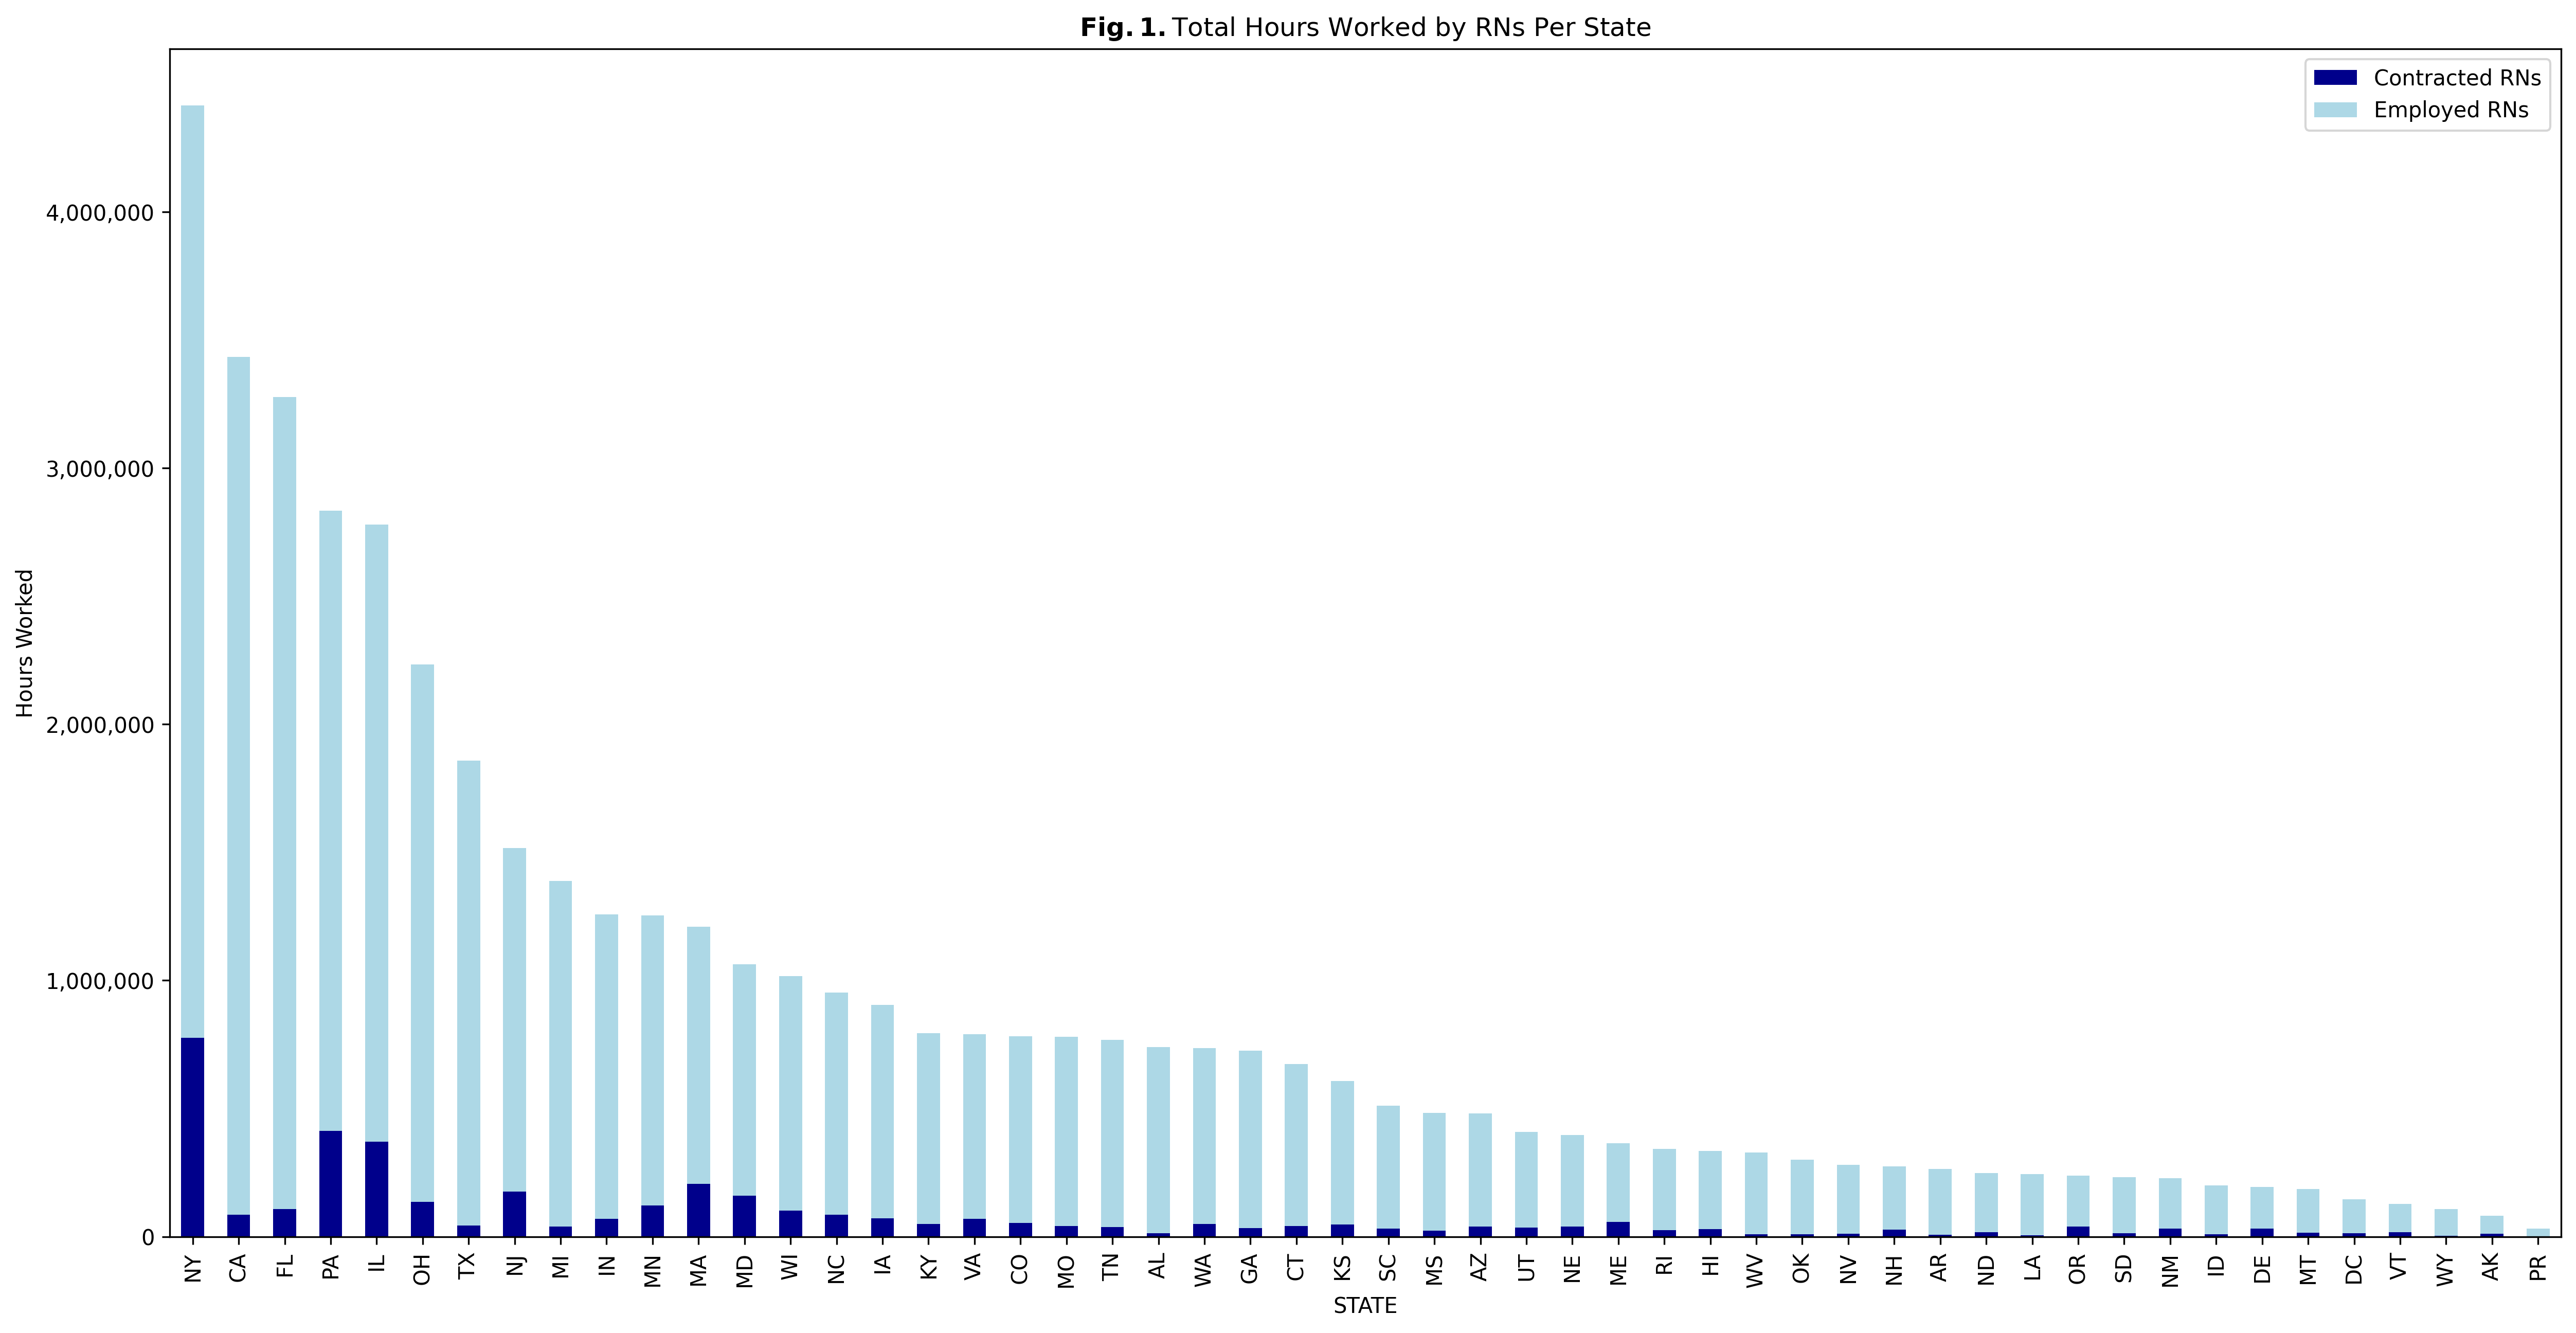

In [35]:
# Group by state and sum hours
hrs_by_state = data.groupby('STATE').agg({'Hrs_RN_ctr': 'sum', 'Hrs_RN_emp': 'sum'}).reset_index()

# Sort by highest total hours
hrs_by_state['Total_Hours'] = hrs_by_state['Hrs_RN_ctr'] + hrs_by_state['Hrs_RN_emp']
hrs_by_state = hrs_by_state.sort_values(by='Total_Hours', ascending=False)

hrs_by_state = hrs_by_state.drop(columns='Total_Hours')

# Plotting
plt.figure(figsize=(20, 6))
ax = hrs_by_state.set_index('STATE').plot(kind='bar', 
                                          stacked=True,
                                          ylabel='Hours Worked', 
                                          color=['darkblue', 'lightblue'], 
                                          figsize=(20, 10)
                                         )

# Labels
plt.title(r"$\bf{" + "Fig.1. " + "}$" + "Total Hours Worked by RNs Per State")
ax.legend(["Contracted RNs", "Employed RNs"])
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}')) # Remove Scientific Formation

plt.show()

## States With Highest Percentage of Contracted RNs

The following pie charts display the top 10 states with the highest percentage of contracted RNs to directly employed RNs. Each chart illustrates the distribution of hours worked between contracted and employed RNs, highlighting the higher reliance on contracted staffing across different states.

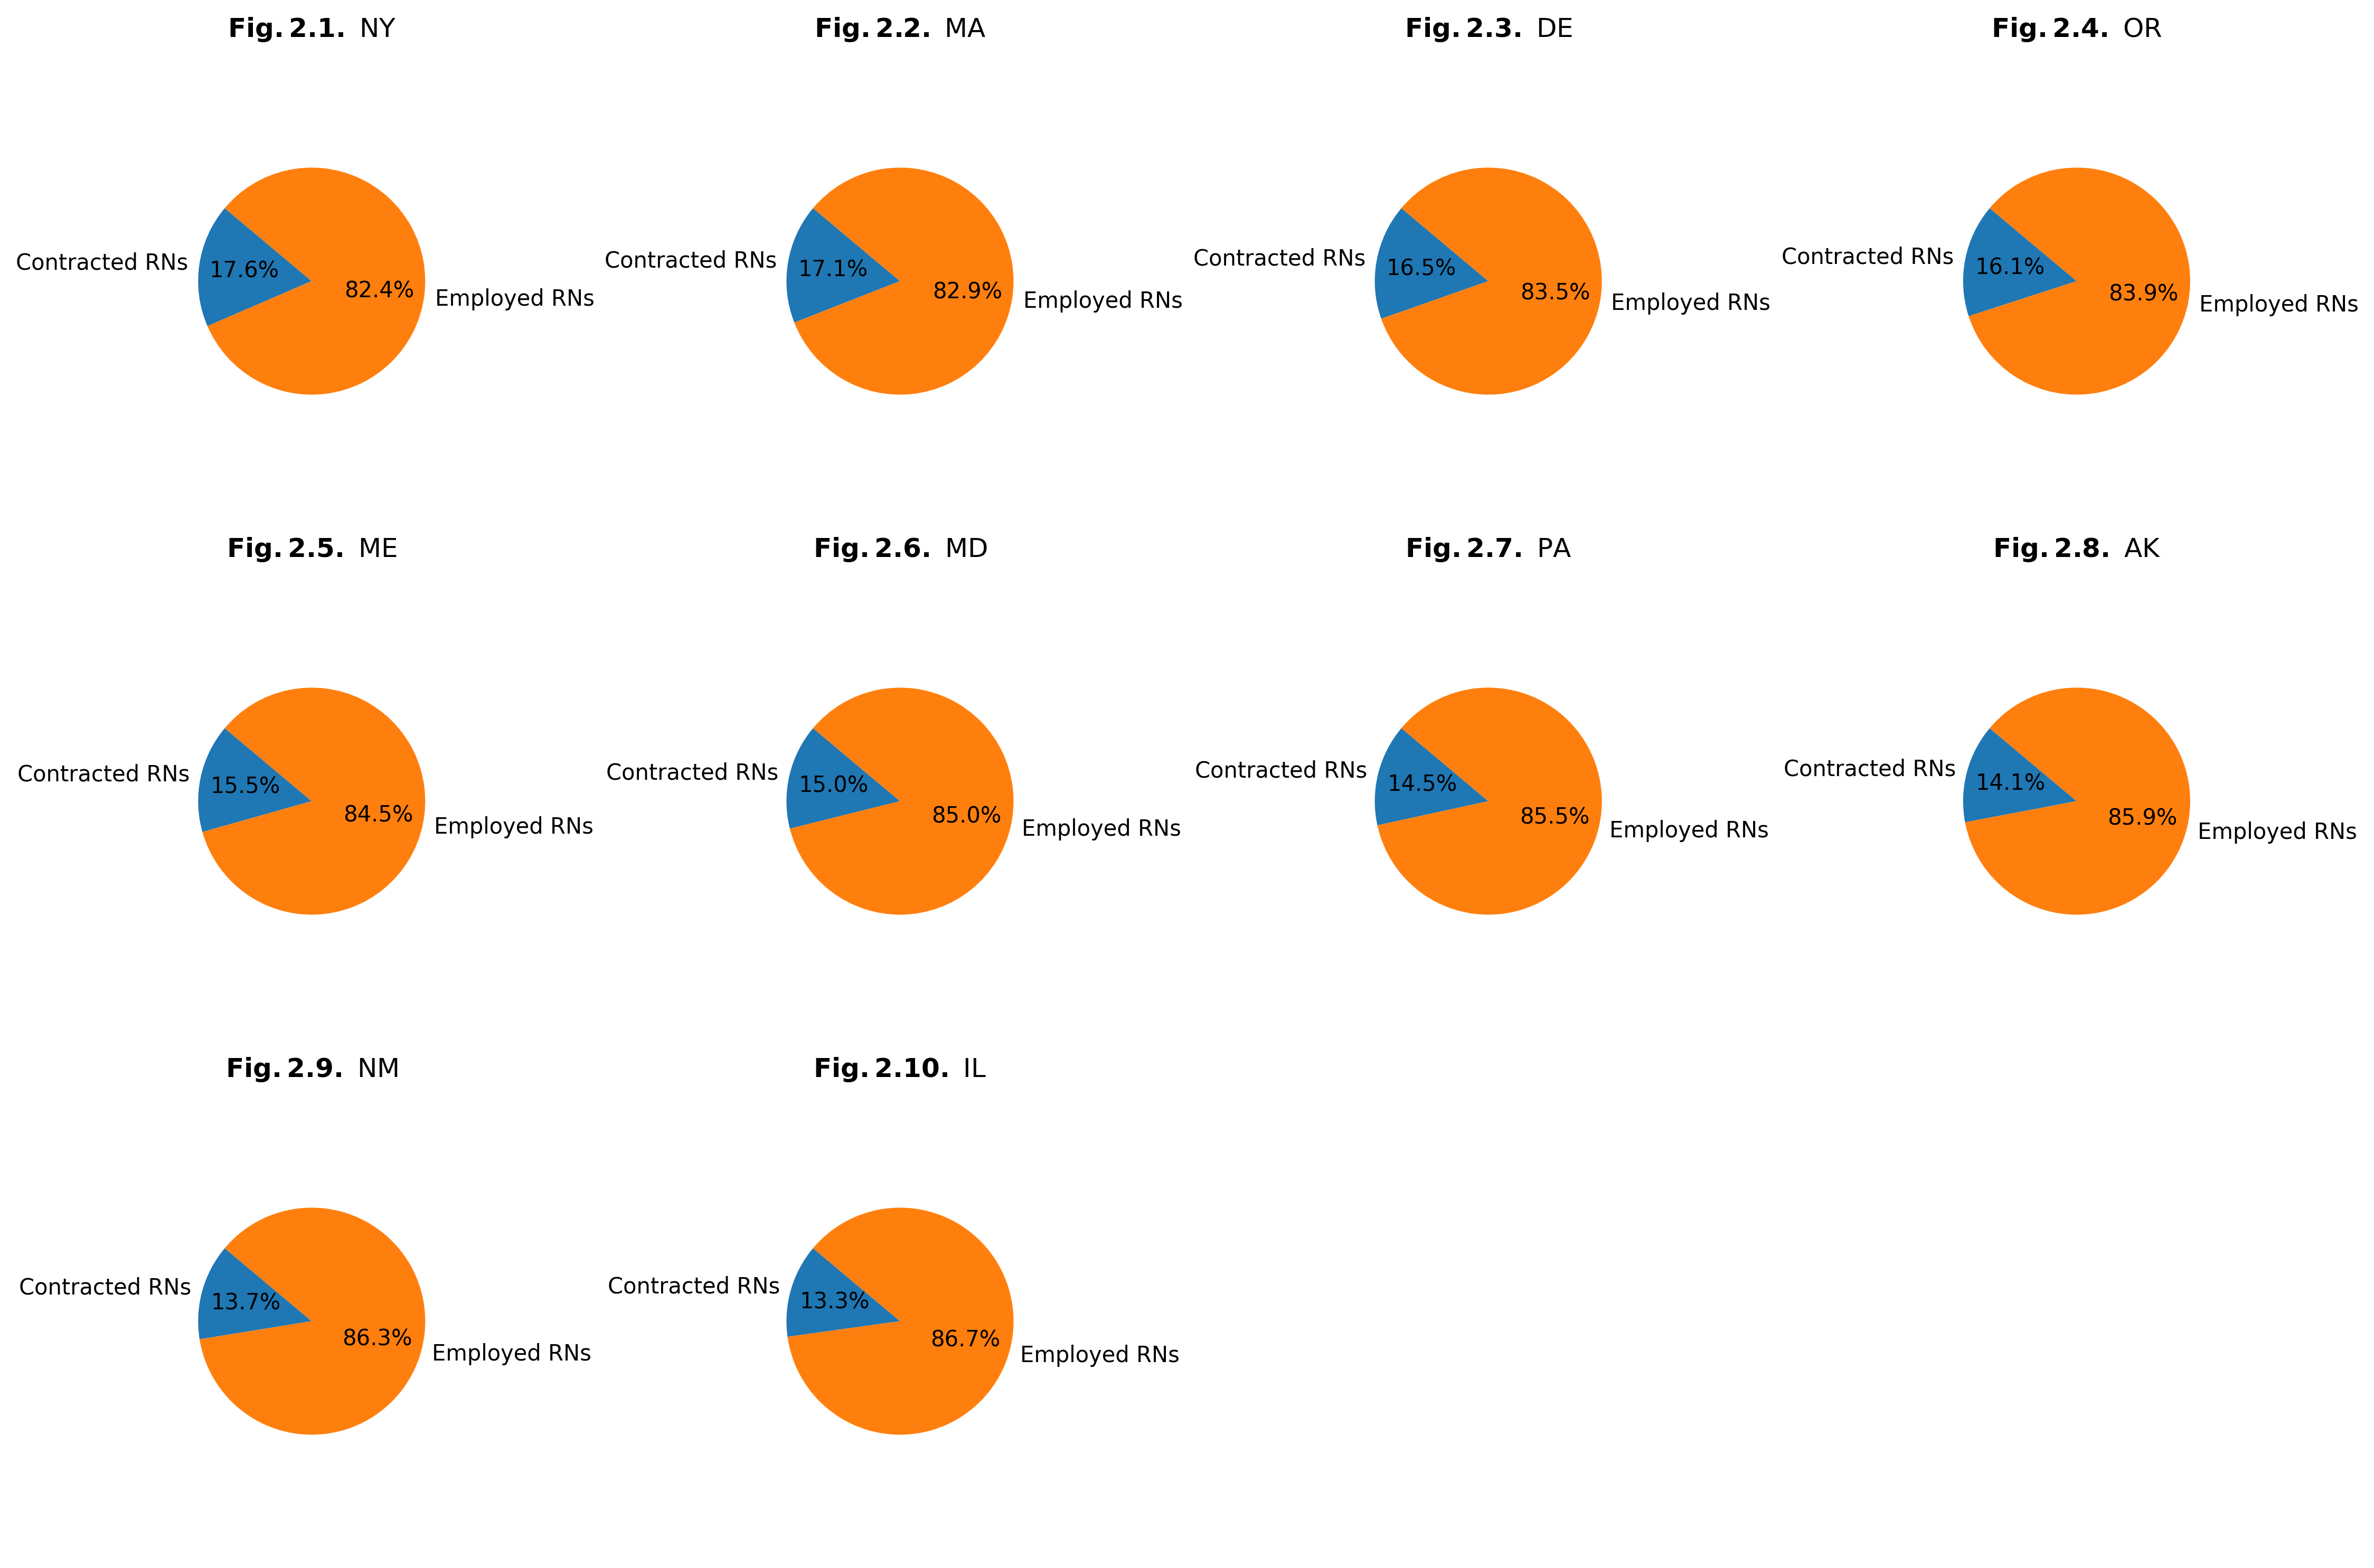

In [36]:
# Group by state and sum hours for contracted and employed RNs
hrs_by_state = data.groupby('STATE').agg({'Hrs_RN_ctr': 'sum', 'Hrs_RN_emp': 'sum'}).reset_index()

# Calculate the percentage of contracted RNs
hrs_by_state['Total_Hours'] = hrs_by_state['Hrs_RN_ctr'] + hrs_by_state['Hrs_RN_emp']
hrs_by_state['Contracted_Percentage'] = (hrs_by_state['Hrs_RN_ctr'] / hrs_by_state['Total_Hours']) * 100

# Filter for top 10 highest percentage of contracted RNs
top_contract_states = hrs_by_state.sort_values(by='Contracted_Percentage', ascending=False).head(10)

# Set up the figure and axes for subplots (2 rows, 5 columns)
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

# Create pie charts for each of the top 10 states
count = 1 # Plot title indexing
for ax, (index, row) in zip(axes, top_contract_states.iterrows()):
    pie_data = [row['Hrs_RN_ctr'], row['Hrs_RN_emp']]
    
    ax.pie(pie_data, labels=['Contracted RNs', 'Employed RNs'], autopct='%1.1f%%', startangle=140)
    
    ax.set_title(r"$\bf{" + "Fig.2. " + f'{count}.' + "}$" + f' {row["STATE"]}')
    ax.axis('equal')

    count+=1

# Hide any unused subplots
for i in range(len(top_contract_states), len(axes)):
    fig.delaxes(axes[i])

# Show the plot
plt.tight_layout()
plt.show()

## States With Lowest Percentage of Contracted RNs

The following pie charts display the 10 states with the lowest percentage of contracted RNs to directly employed RNs. Each chart reveals the distribution of hours worked between contracted and employed RNs in these states, illustrating the lower reliance on contracted staffing in contrast to their counterparts.

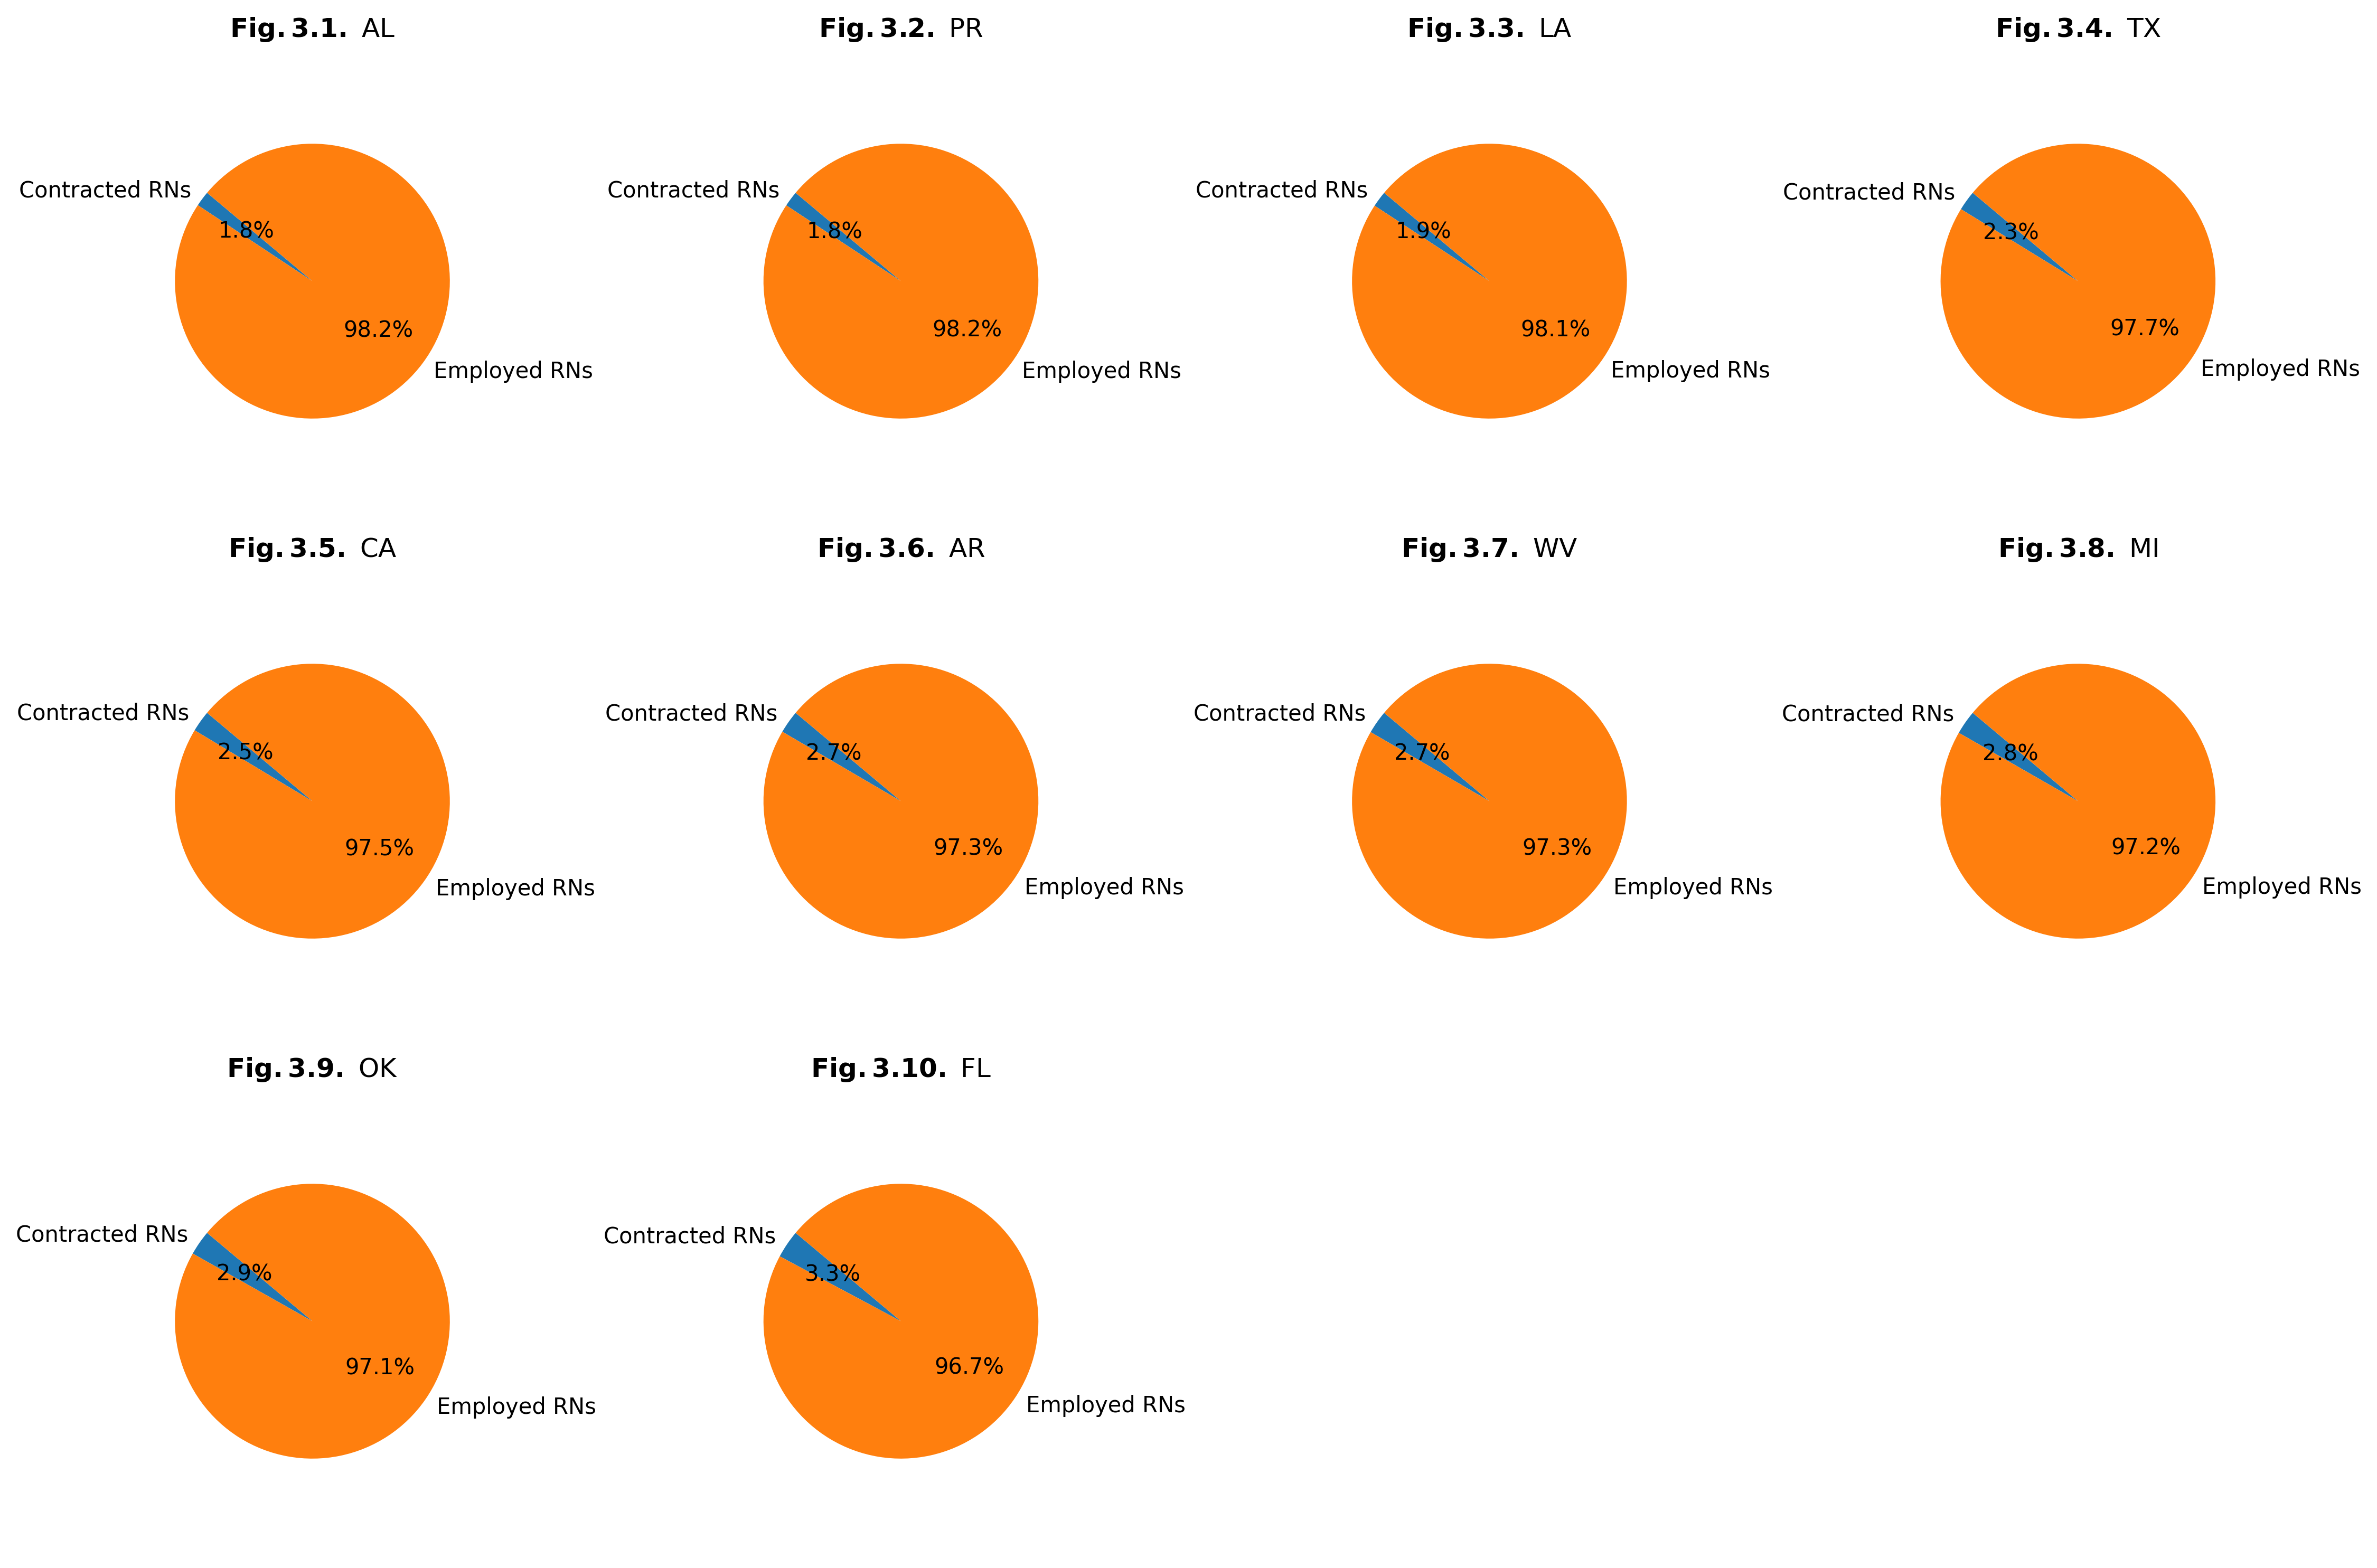

In [37]:
# Group by state and sum hours for contracted and employed RNs
hrs_by_state = data.groupby('STATE').agg({'Hrs_RN_ctr': 'sum', 'Hrs_RN_emp': 'sum'}).reset_index()

# Calculate the percentage of contracted RNs
hrs_by_state['Total_Hours'] = hrs_by_state['Hrs_RN_ctr'] + hrs_by_state['Hrs_RN_emp']
hrs_by_state['Contracted_Percentage'] = (hrs_by_state['Hrs_RN_ctr'] / hrs_by_state['Total_Hours']) * 100

# Filter for top 10 highest percentage of contracted RNs
top_contract_states = hrs_by_state.sort_values(by='Contracted_Percentage', ascending=True).head(10)

# Set up the figure and axes for subplots (2 rows, 5 columns)
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

# Create pie charts for each of the bottom 10 states
count = 1
for ax, (index, row) in zip(axes, top_contract_states.iterrows()):
    pie_data = [row['Hrs_RN_ctr'], row['Hrs_RN_emp']]
    
    ax.pie(pie_data, labels=['Contracted RNs', 'Employed RNs'], autopct='%1.1f%%', startangle=140)
    
    ax.set_title(r"$\bf{" + "Fig.3. " + f'{count}.' + "}$" + f' {row["STATE"]}')
    ax.axis('equal')

    count+=1
# Hide any unused subplots
for i in range(len(top_contract_states), len(axes)):
    fig.delaxes(axes[i])

# Show the plot
plt.tight_layout()
plt.show()

## Registered Nurse Hours per Month

The following stacked bar graph illustrates the total hours worked by RNs within the current quarter. Employed RNs are represented in dark blue, while contracted RNs are shown in light blue. This visual comparison allows for an understanding of the distribution of nursing hours, highlighting the relative contributions of employed versus contracted staff during this quarter.

Employed RNs work 10.6 times more than contracted RNs


<Figure size 3600x1800 with 0 Axes>

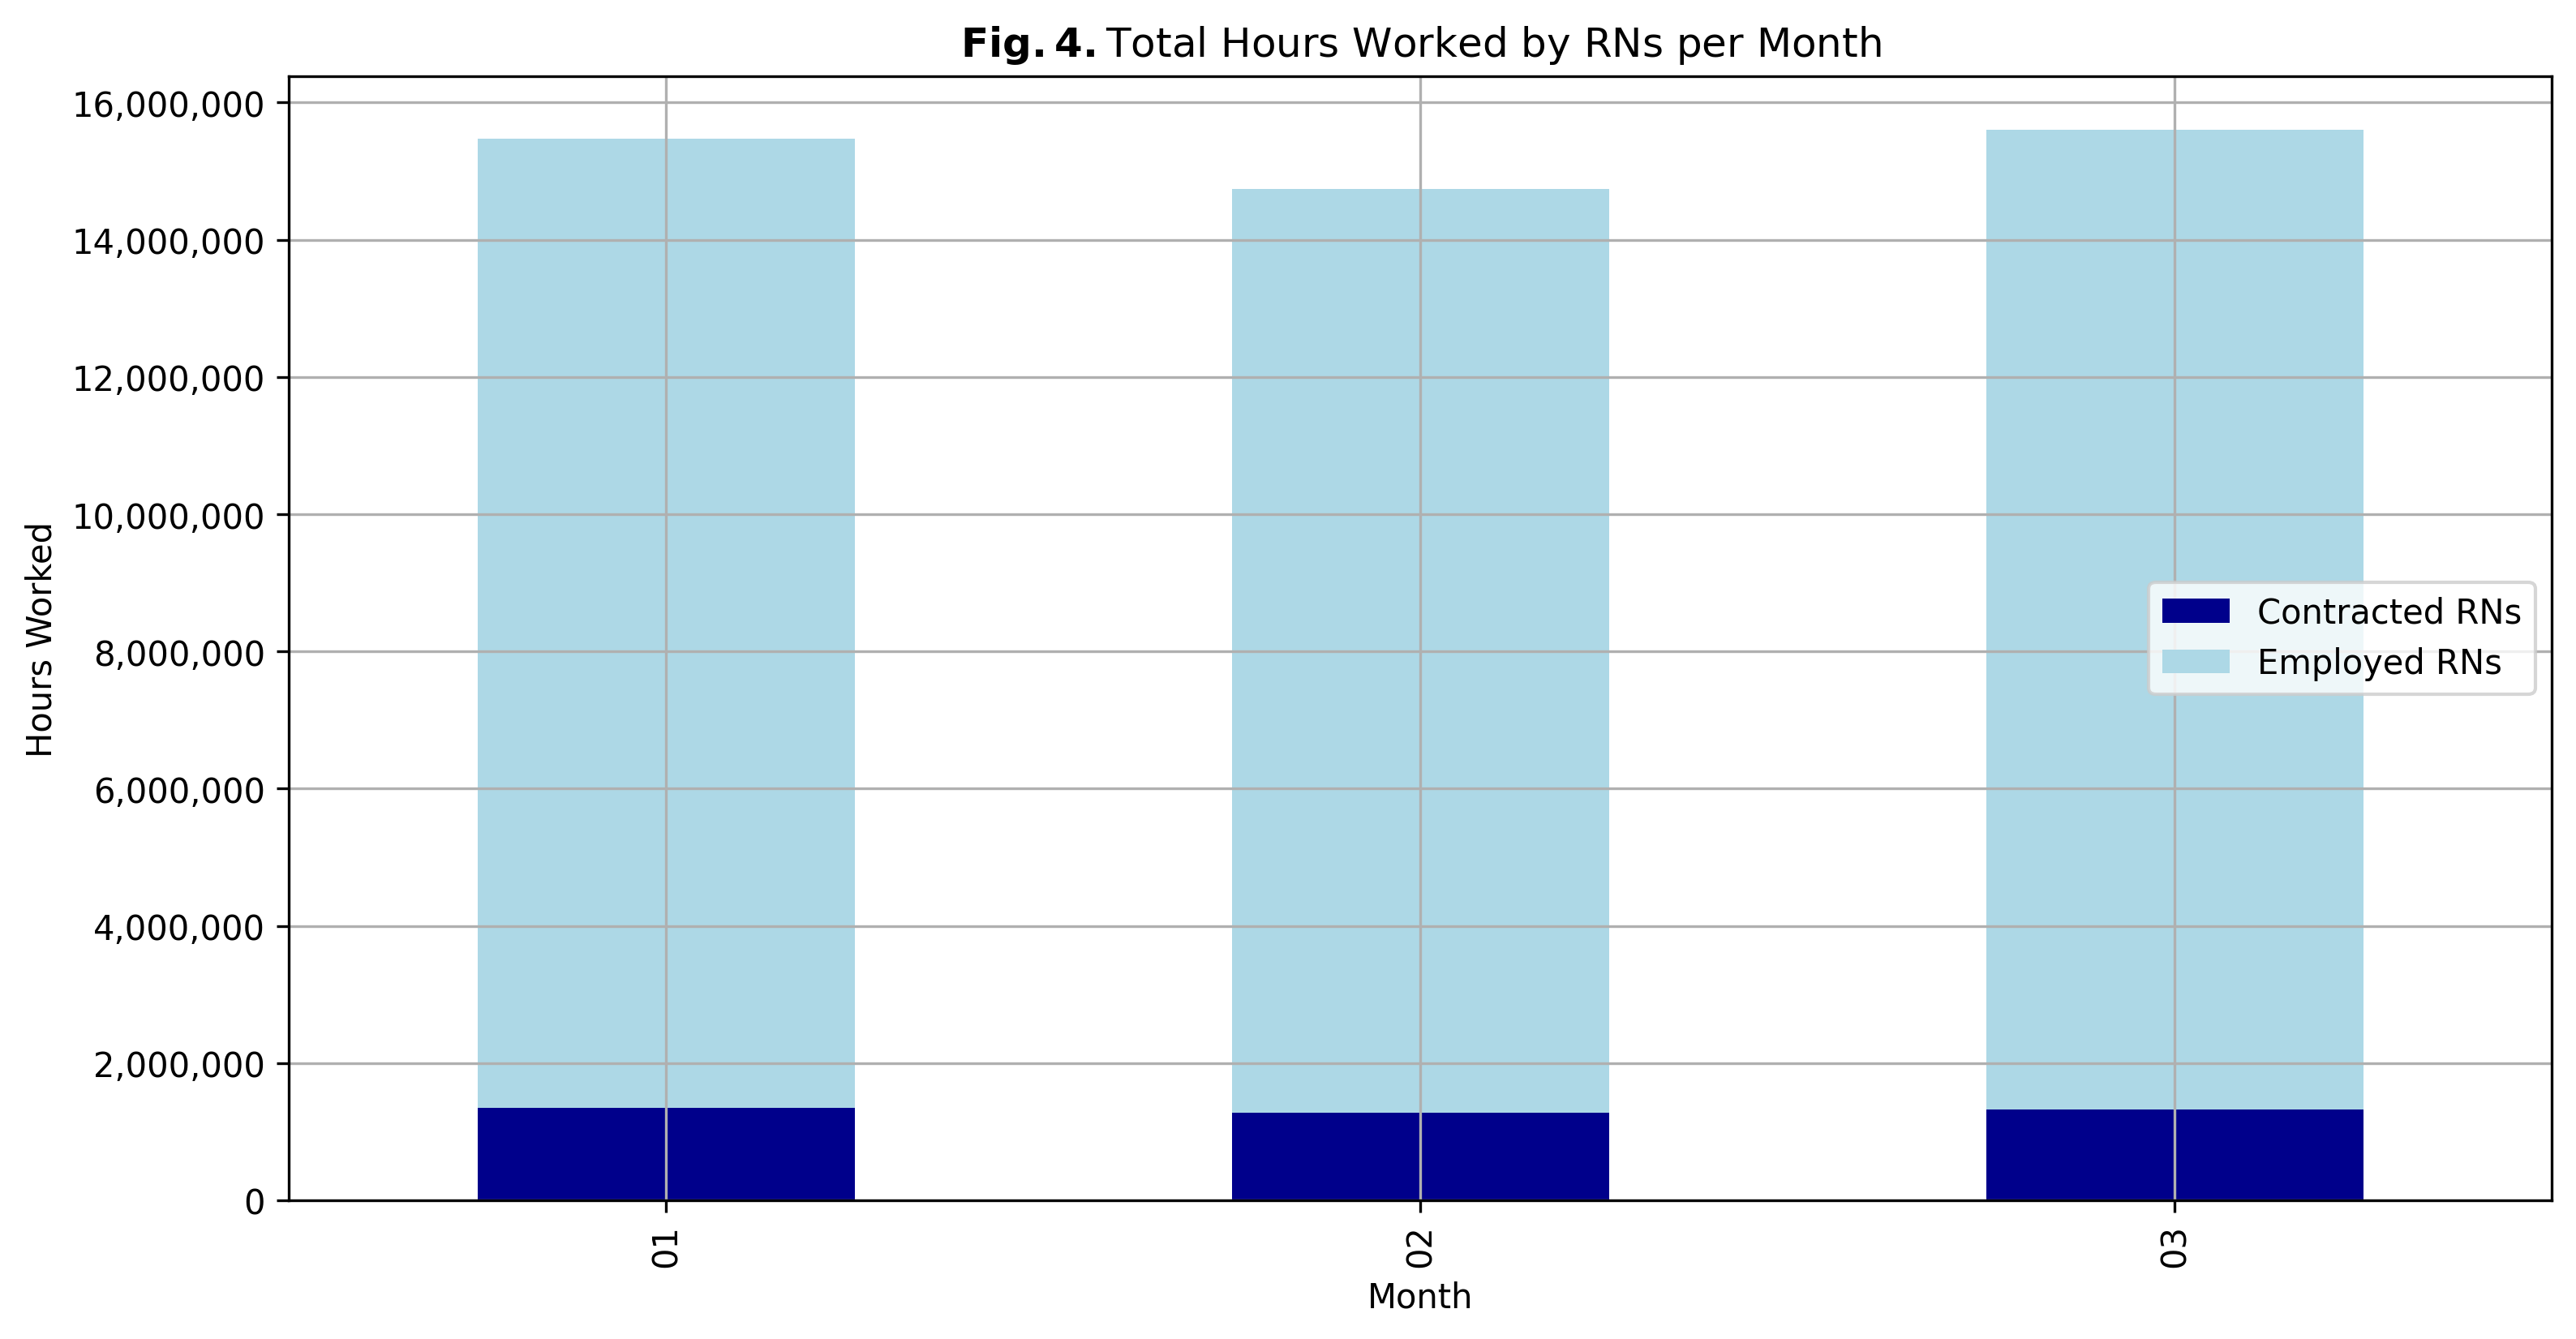

In [38]:
monthly = data[['WorkDate', 'Hrs_RN_emp', 'Hrs_RN_ctr']].copy()

# Extract the month from WorkDate
monthly['WorkDate'] = monthly['WorkDate'].astype(str)
monthly['Month'] = monthly['WorkDate'].str[4:6]

# Group by month and sum hours
monthly_hours = monthly.groupby('Month').agg({'Hrs_RN_emp': 'sum', 'Hrs_RN_ctr': 'sum'}).reset_index()

# Calculate average hours for employed and contracted RNs
average_hours_employed = monthly_hours['Hrs_RN_emp'].mean()
average_hours_contracted = monthly_hours['Hrs_RN_ctr'].mean()

# Calculate the difference and ratio
difference = average_hours_employed - average_hours_contracted
ratio = average_hours_employed / average_hours_contracted if average_hours_contracted != 0 else float('inf')

# Print the result
if average_hours_contracted != 0:
    print(f"Employed RNs work {ratio:.1f} times more than contracted RNs")
else:
    print("Contracted RNs have no recorded hours, cannot calculate ratio.")

# Plotting
plt.figure(figsize=(12, 6))
monthly_hours.set_index('Month')[['Hrs_RN_ctr', 'Hrs_RN_emp']].plot(kind='bar', stacked=True, color=['darkblue', 'lightblue'], figsize=(12, 6))

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))  # Remove Scientific Formation

# Labels
plt.xlabel('Month')
plt.ylabel('Hours Worked')
plt.title(r"$\bf{" + "Fig.4. " + "}$" + "Total Hours Worked by RNs per Month")
plt.legend(labels=['Contracted RNs', 'Employed RNs'], loc='center right')
plt.grid()

plt.show()

With access to historical data, the use of a line graph could highlight trends over time. However, when only using 2024Q1 the plot does not produce a good visual. Focusing solely on the data from 2024Q1 limits the visualization's effectiveness, as it may not adequately convey meaningful patterns or changes. For this reason, a stacked bar graph provides a clearer representation of the distribution of hours worked by employed and contracted RNs within that specific quarter.

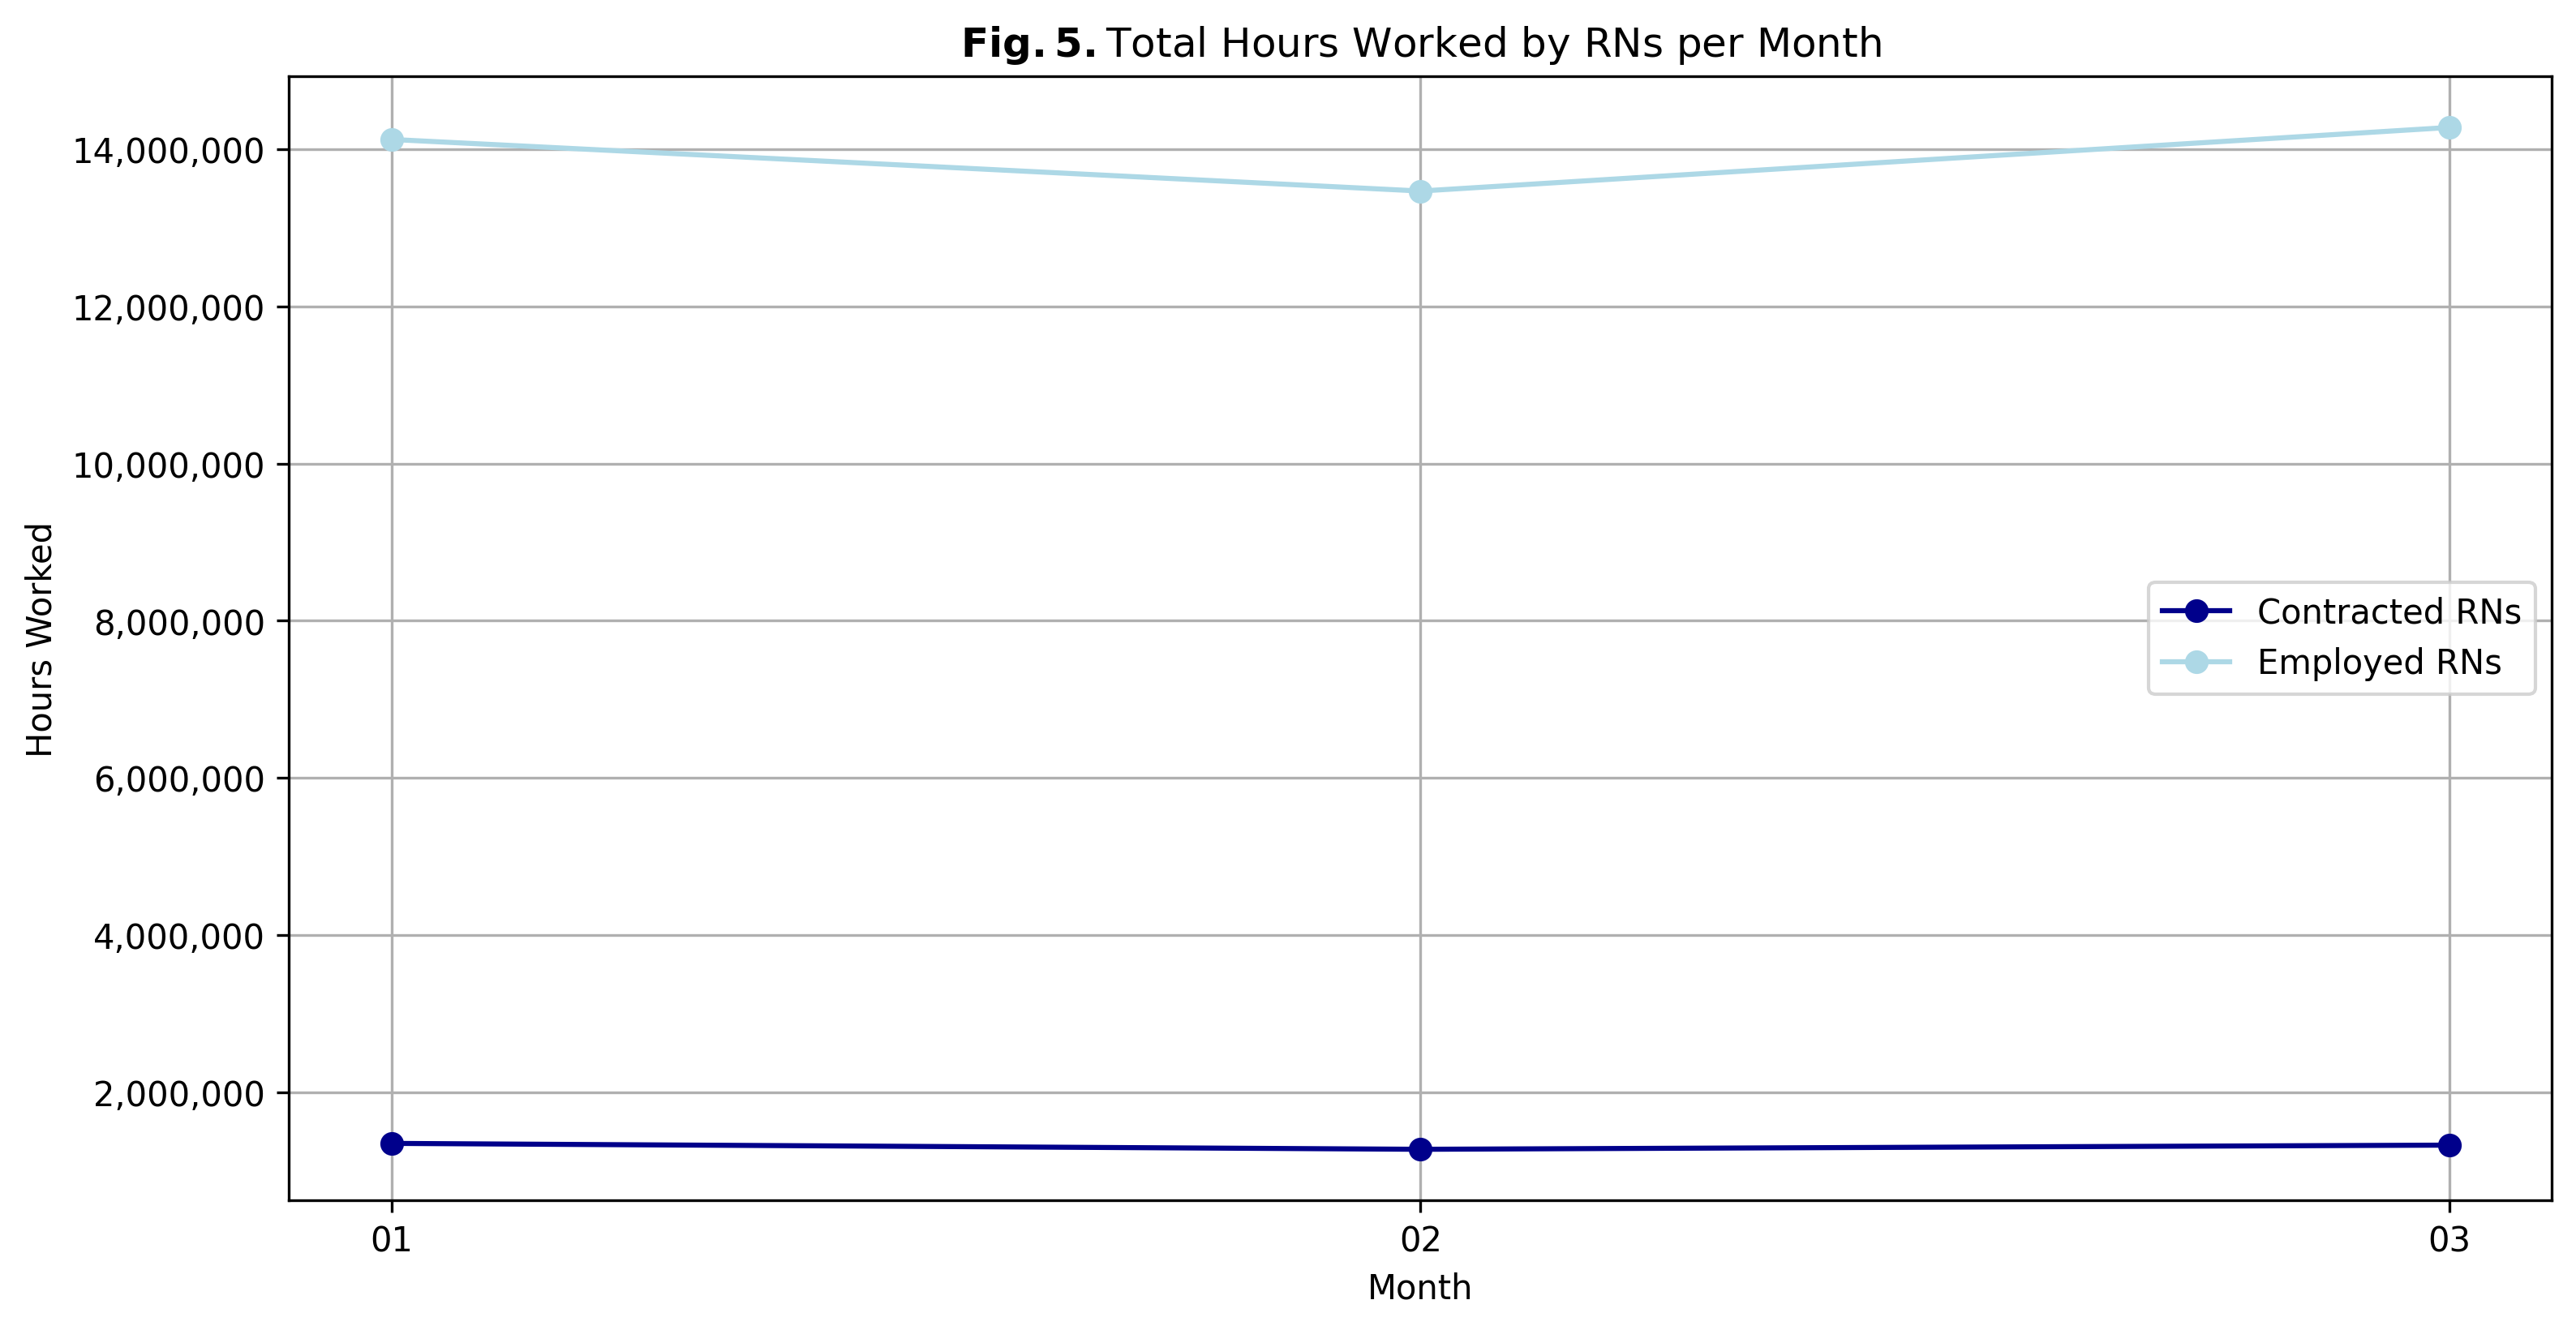

In [39]:
monthly = data[['WorkDate', 'Hrs_RN_emp', 'Hrs_RN_ctr']].copy()

# Extract the month from WorkDate
monthly['WorkDate'] = monthly['WorkDate'].astype(str)
monthly['Month'] = monthly['WorkDate'].str[4:6]

# Group by month and sum hours
monthly_hours = monthly.groupby('Month').agg({'Hrs_RN_emp': 'sum', 'Hrs_RN_ctr': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_hours['Month'], monthly_hours['Hrs_RN_ctr'], marker='o', linestyle='-', color='darkblue', label='Contracted RNs')
plt.plot(monthly_hours['Month'], monthly_hours['Hrs_RN_emp'], marker='o', linestyle='-', color='lightblue', label='Employed RNs')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}')) # Remove Scientific Formation

# Labels and title
plt.xlabel('Month')
plt.ylabel('Hours Worked')
plt.title(r"$\bf{" + "Fig.5. " + "}$" + "Total Hours Worked by RNs per Month")
plt.legend(labels=['Contracted RNs', 'Employed RNs'], loc='best')
plt.grid()

plt.show()

## Top Providers' Hours for Contracted Registered Nurses

The following bar graph focuses on the top providers within the dataset, specifically highlighting the 20 providers with the highest total hours worked. By grouping the data by provider, we can identify the key players in terms of staffing levels, offering insights into which facilities rely more heavily on contracted nursing staff.

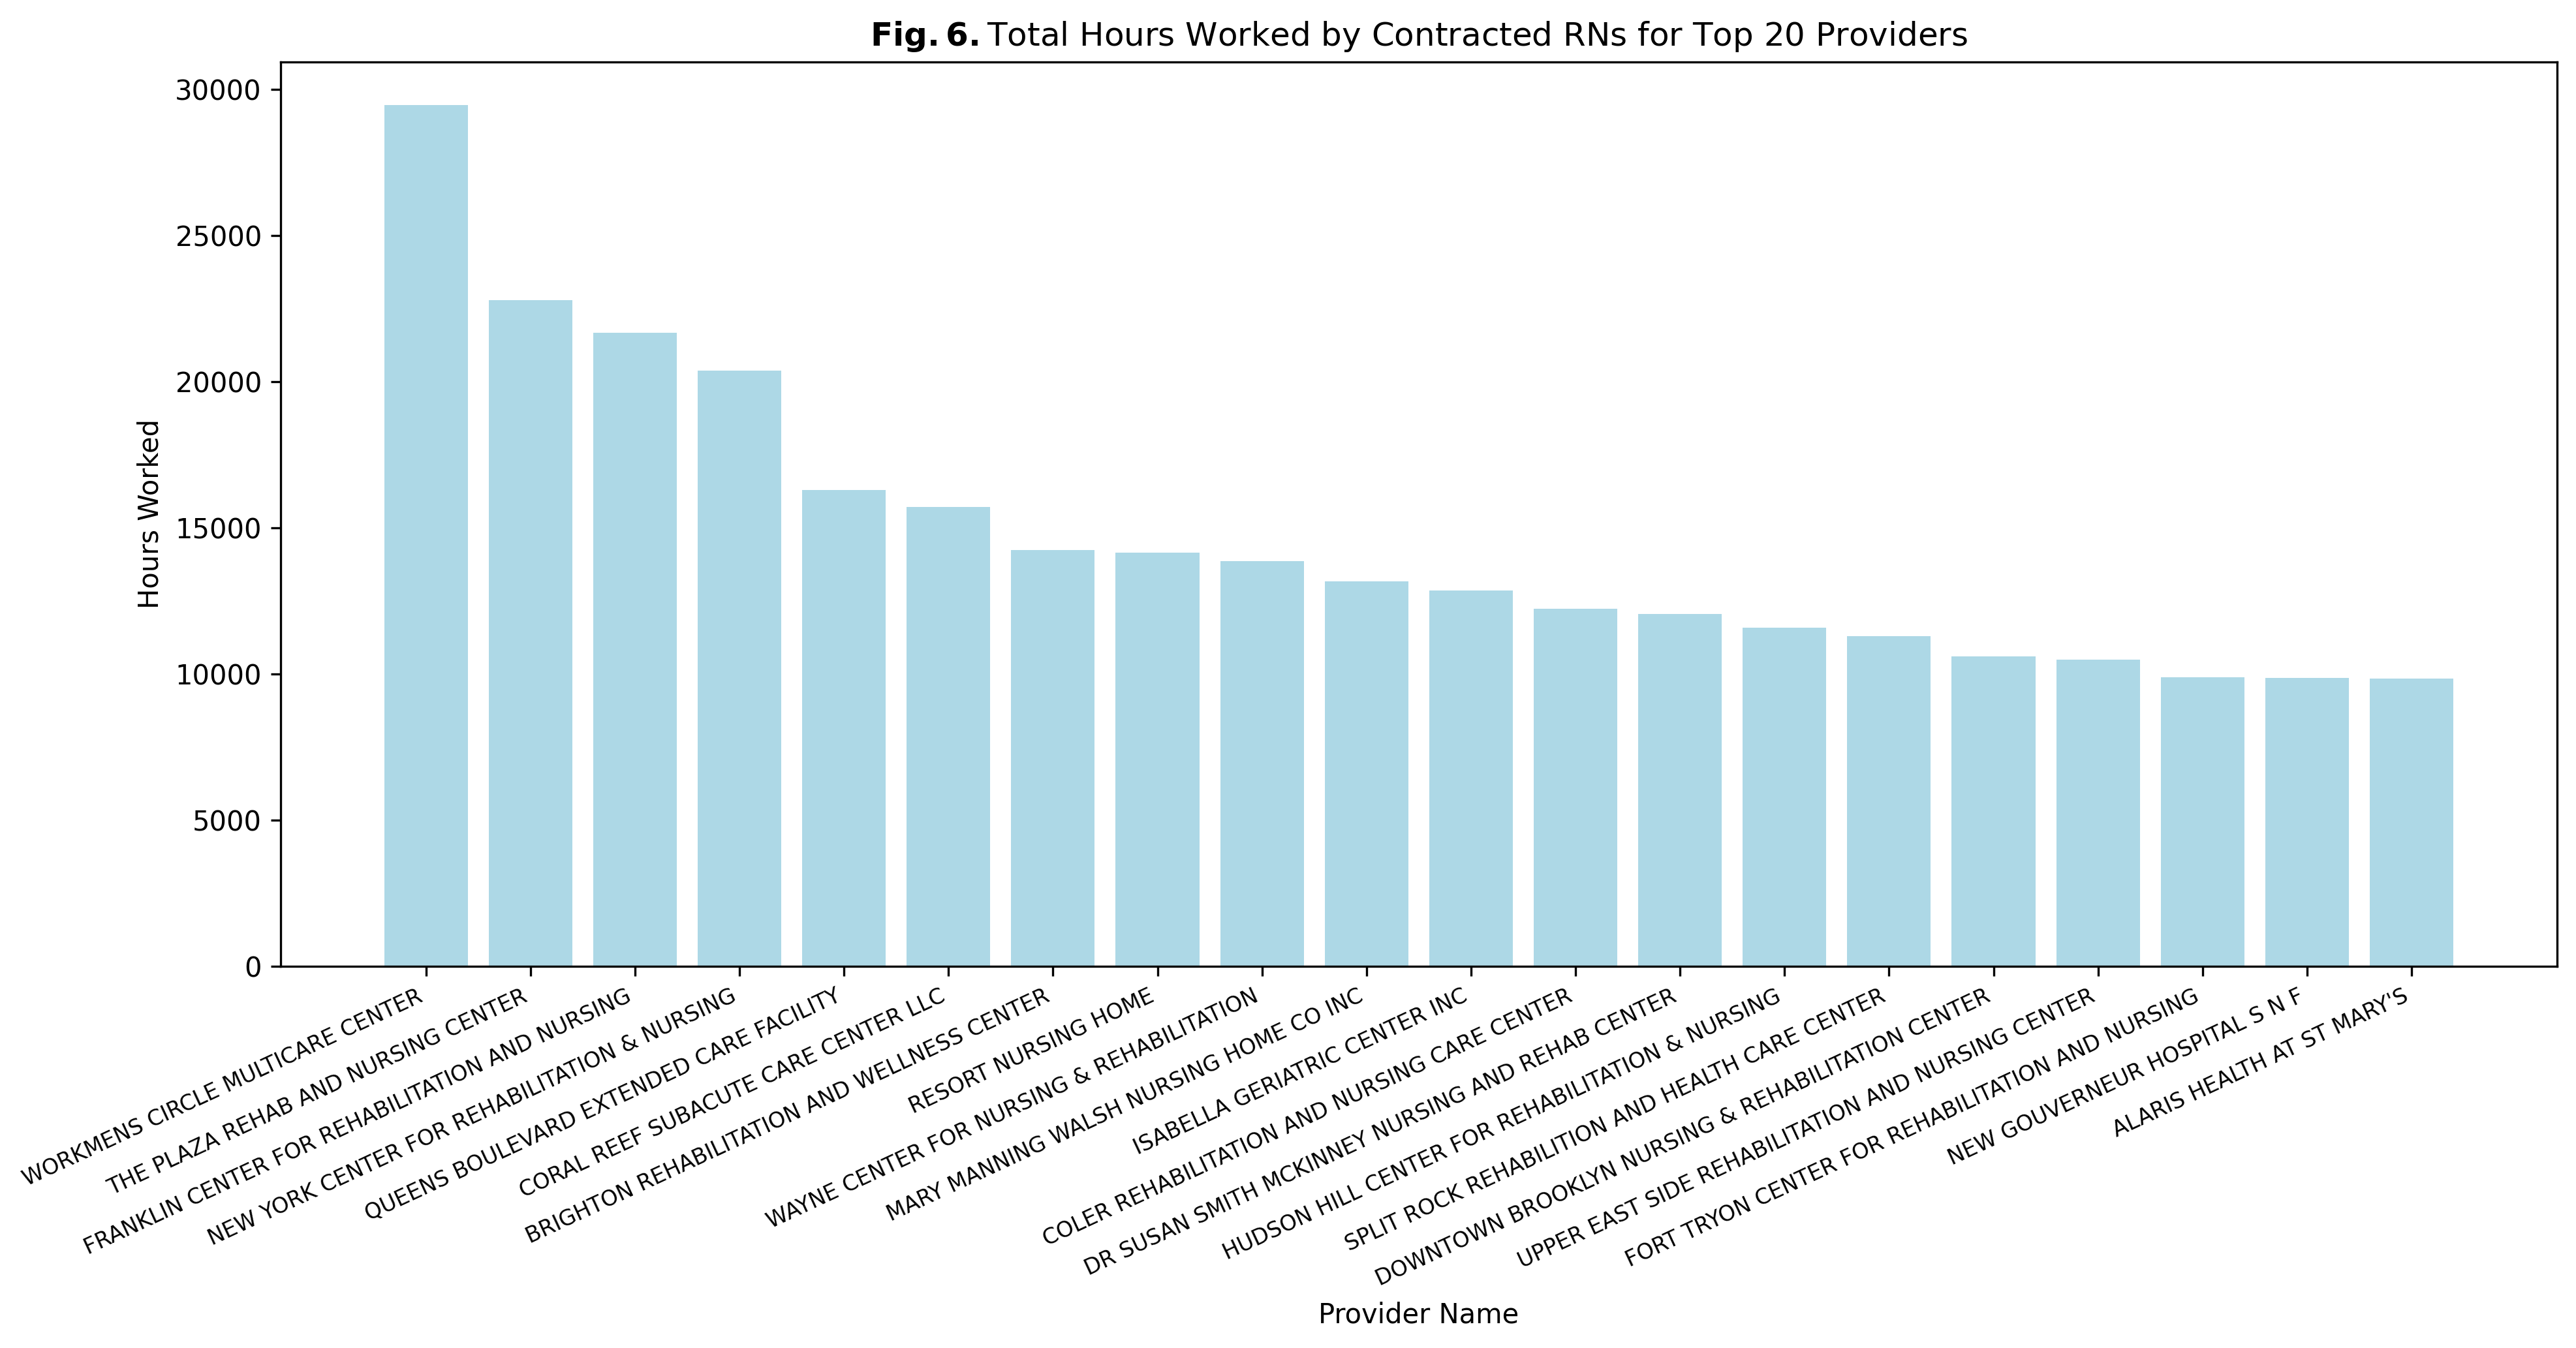

In [40]:
hours_per_provider = data.groupby('PROVNAME')['Hrs_RN_ctr'].sum().reset_index()

# Filter for top 20 providers
top_hours_per_provider = hours_per_provider.sort_values(by='Hrs_RN_ctr', ascending=False).head(20)

# Plotting
plt.figure(figsize=(15, 6))
plt.bar(top_hours_per_provider['PROVNAME'], top_hours_per_provider['Hrs_RN_ctr'], color='lightblue')

# Labels and title
plt.xlabel('Provider Name')
plt.ylabel('Hours Worked')
plt.title(r"$\bf{" + "Fig.6. " + "}$" + "Total Hours Worked by Contracted RNs for Top 20 Providers")
plt.xticks(rotation=25, ha='right', fontsize=8)

plt.show()

## Bottom Providers' Hours for Contracted Registered Nurses

The following bar graph focuses on the bottom providers within the dataset, specifically highlighting the 20 providers with the lowest total hours worked. This offers insights into which facilities rely almost entirely on directly employed staff.

Number of providers with less than 24 total hours: 9295


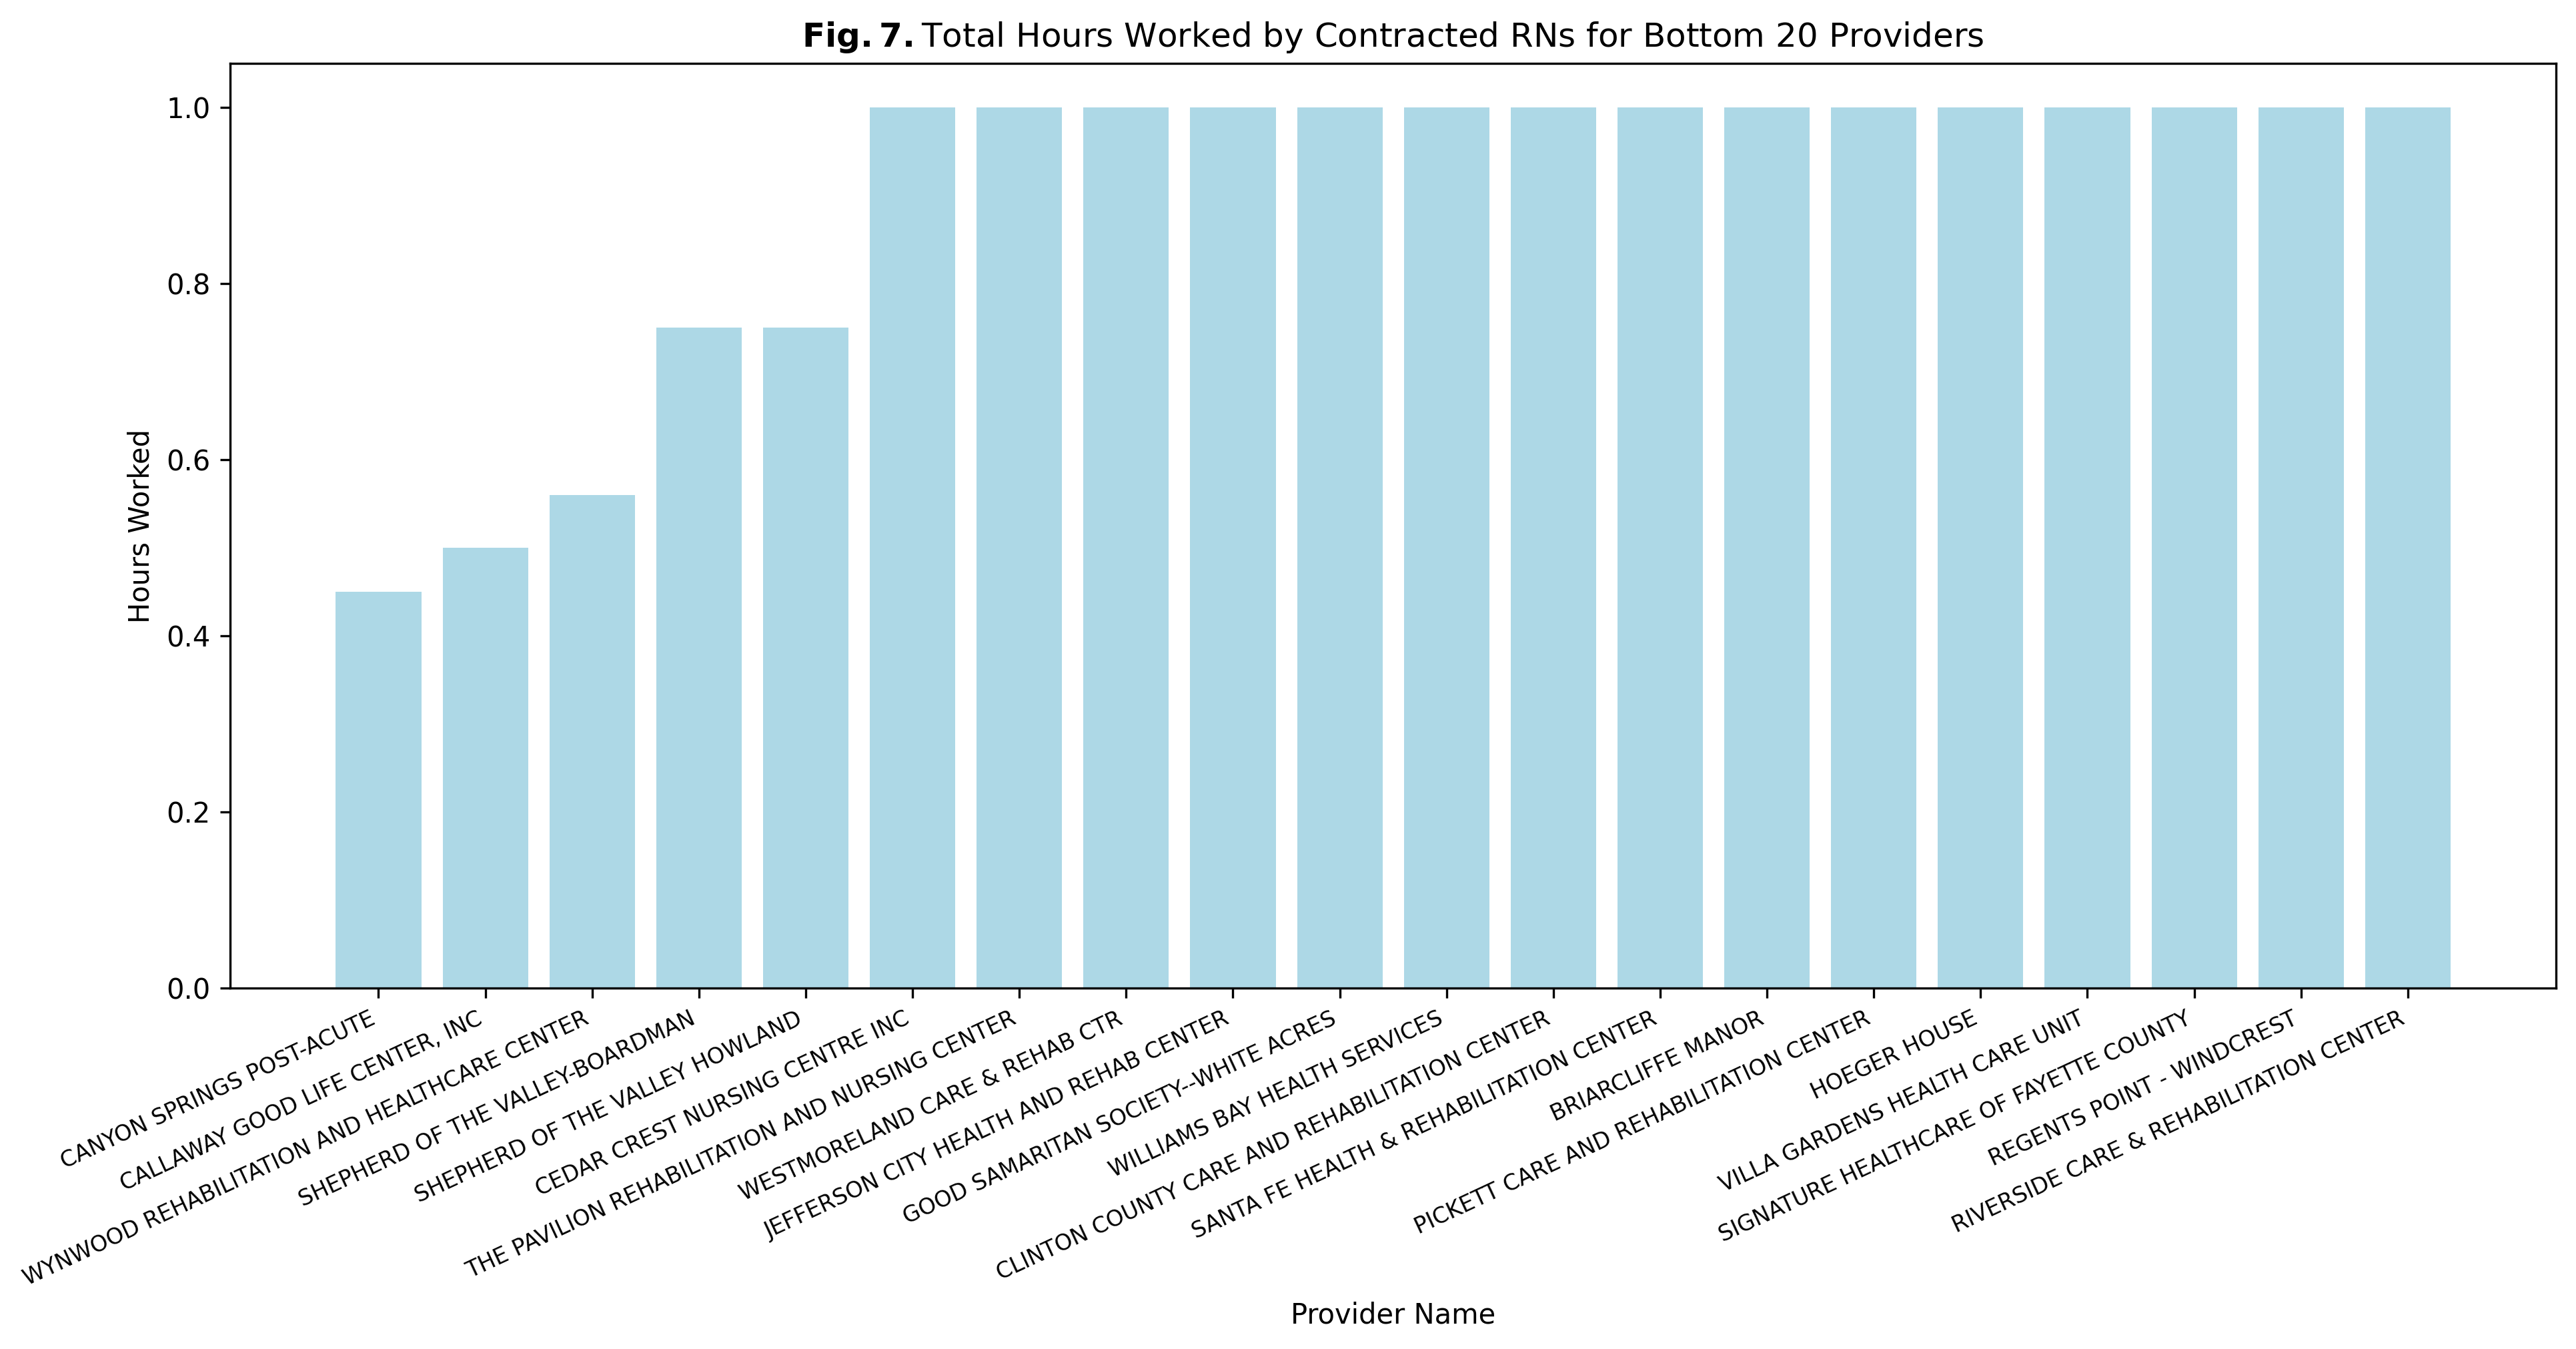

In [41]:
# Filter for bottom 20 providers
bottom_hours_per_provider = hours_per_provider[hours_per_provider['Hrs_RN_ctr'] > 0].sort_values(by='Hrs_RN_ctr', ascending=True).head(20)

# Count number of providers with less than a day worked
low_hours = (hours_per_provider[hours_per_provider['Hrs_RN_ctr'] < 24].shape[0])
print(f'Number of providers with less than 24 total hours: {low_hours}')

# Plotting
plt.figure(figsize=(15, 6))
plt.bar(bottom_hours_per_provider['PROVNAME'], bottom_hours_per_provider['Hrs_RN_ctr'], color='lightblue')

# Labels and title
plt.xlabel('Provider Name')
plt.ylabel('Hours Worked')
plt.title(r"$\bf{" + "Fig.7. " + "}$" + "Total Hours Worked by Contracted RNs for Bottom 20 Providers")
plt.xticks(rotation=25, ha='right', fontsize=8)
plt.show()

## Mean Providers' Hours for Contracted Registered Nurses

The following bar graph emphasizes the mean providers within the dataset by showcasing the 20 providers whose hours worked are closest to the average. This method offers insights into the typical workload for contracted RNs across different facilities, highlighting those that operate near the mean.

Mean hours worked by contracted RNs: 273


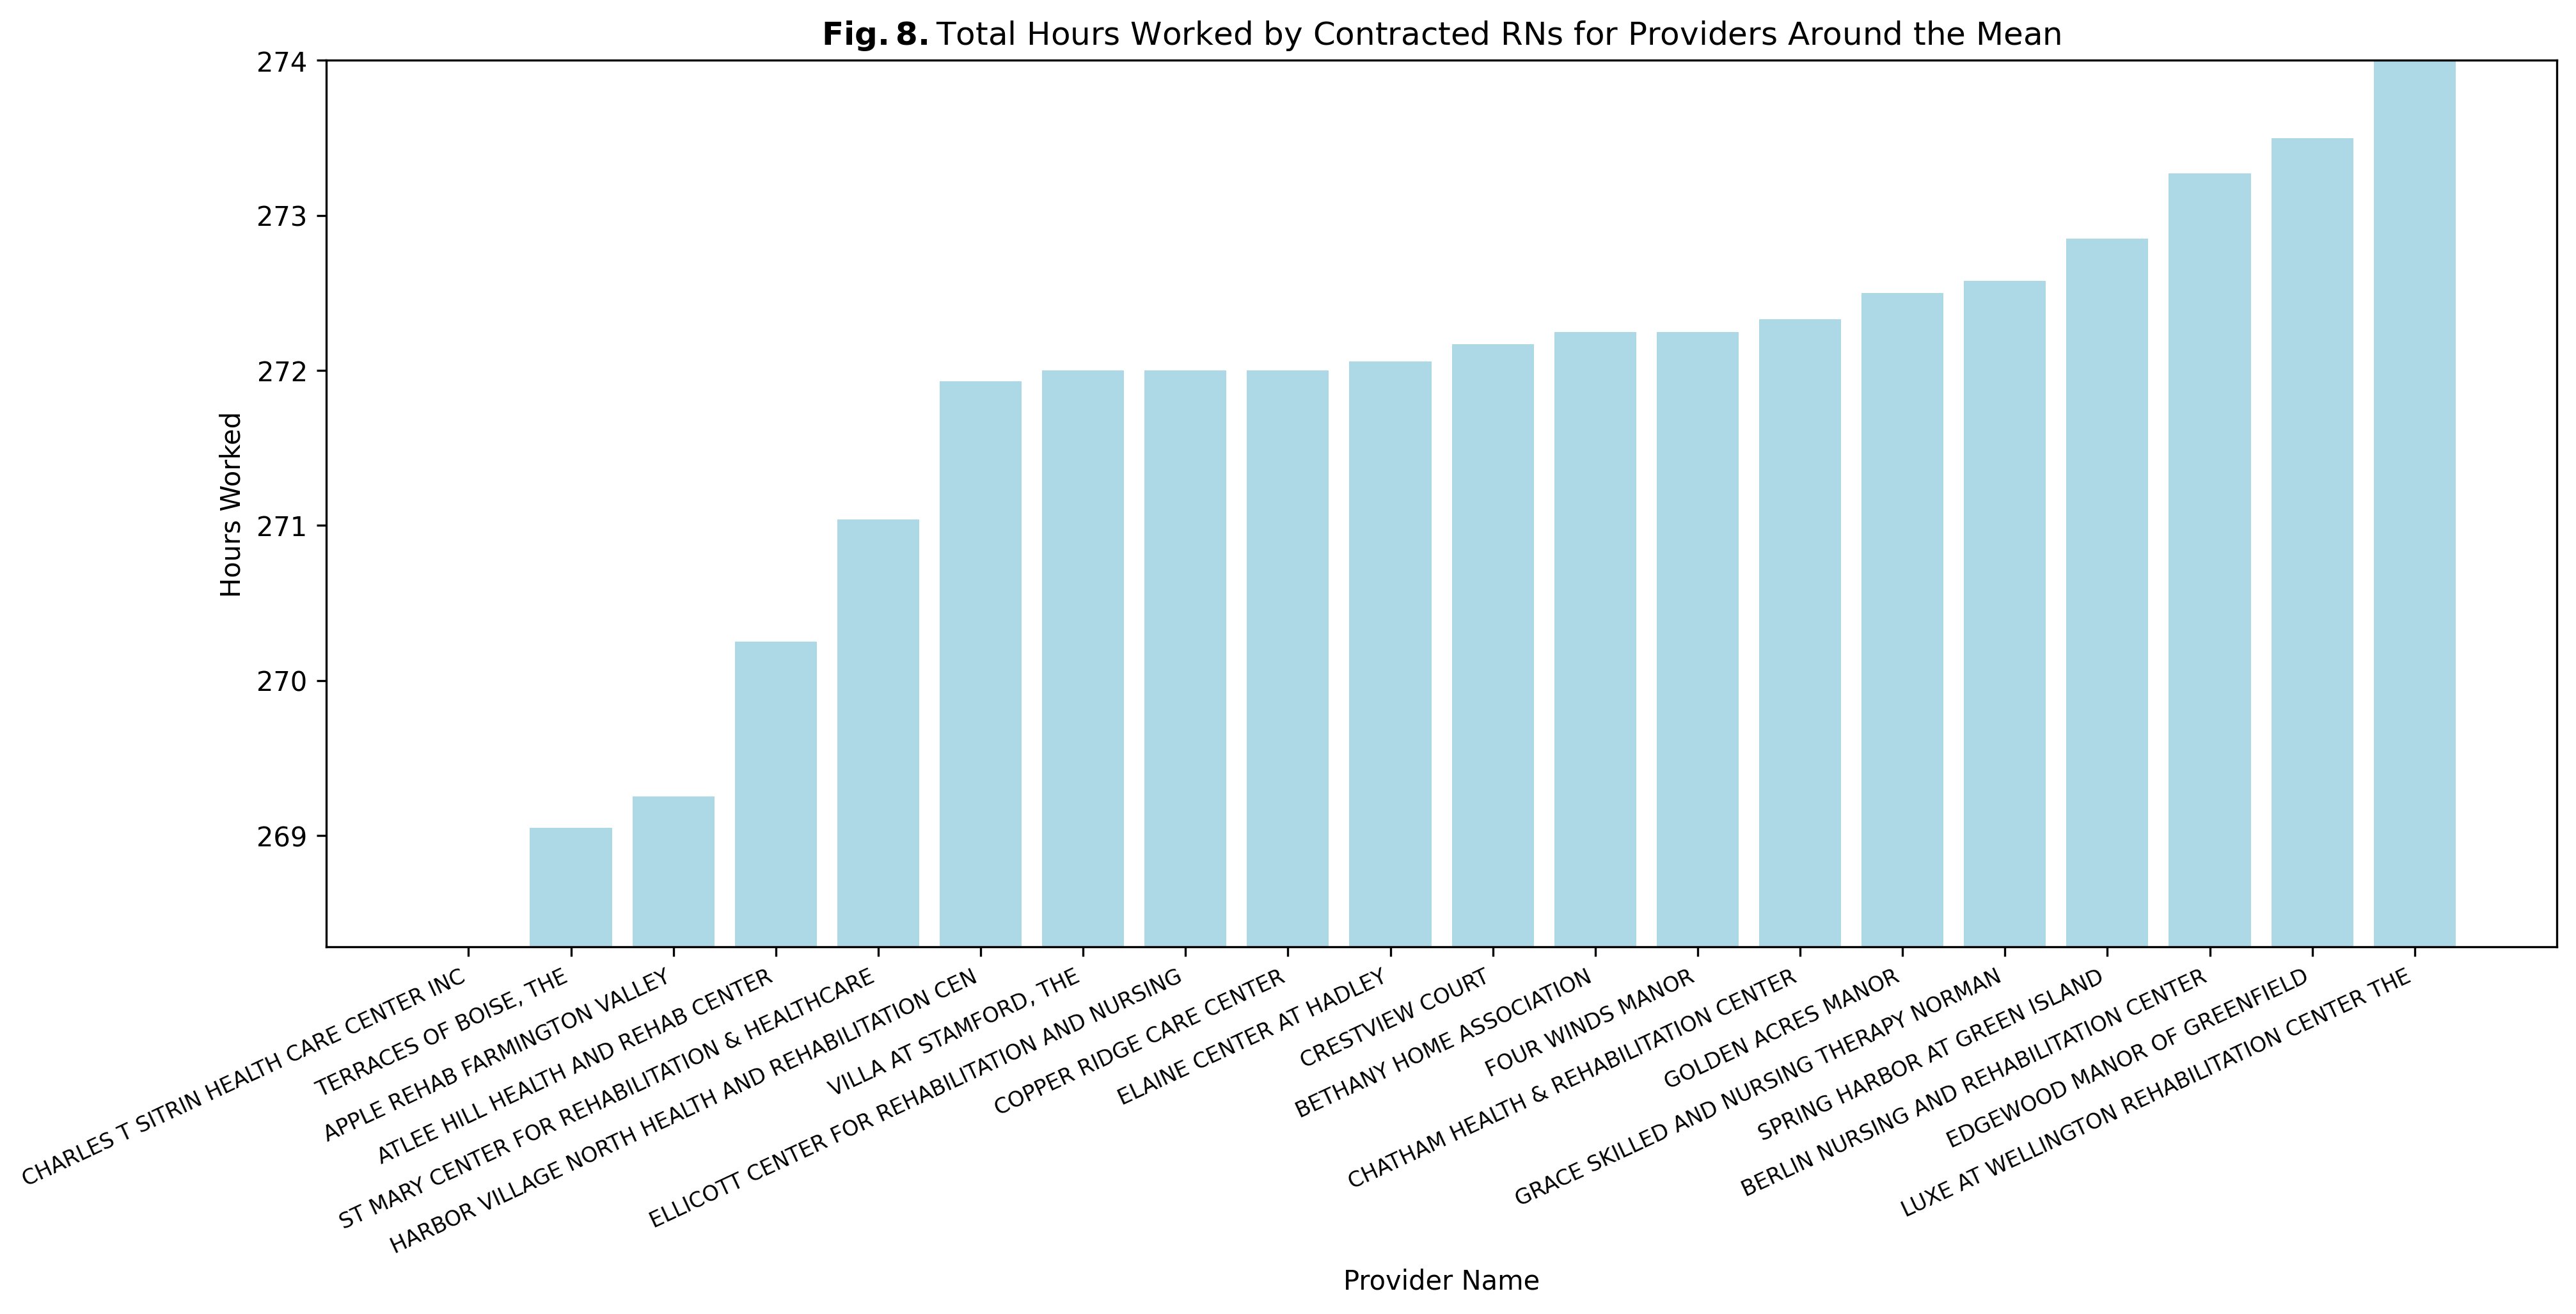

In [42]:
# Calculate the mean hours worked
mean_hours = hours_per_provider['Hrs_RN_ctr'].mean()

print(f'Mean hours worked by contracted RNs: {int(mean_hours)}')

# Filter for providers with hours worked around the mean
threshold = 5

mean_hours_per_provider = hours_per_provider[
    (hours_per_provider['Hrs_RN_ctr'] > (mean_hours - threshold)) &
    (hours_per_provider['Hrs_RN_ctr'] < (mean_hours + threshold))
].sort_values(by='Hrs_RN_ctr', ascending=True).head(20)

# Plotting
plt.figure(figsize=(15, 6))
plt.bar(mean_hours_per_provider['PROVNAME'], mean_hours_per_provider['Hrs_RN_ctr'], color='lightblue')

# Labels and title
plt.xlabel('Provider Name')
plt.ylabel('Hours Worked')
plt.ylim(mean_hours_per_provider['Hrs_RN_ctr'].min(), mean_hours_per_provider['Hrs_RN_ctr'].max())
plt.title(r"$\bf{" + "Fig.8. " + "}$" + "Total Hours Worked by Contracted RNs for Providers Around the Mean")
plt.xticks(rotation=25, ha='right', fontsize=8)
plt.show()

## Hours Worked for Each Contracted Group

The following pie chart shows the distribution of hours worked among all contracted nursing groups, providing a clear visual representation of how total hours are allocated across different categories. This chart highlights the proportion of hours contributed by each group, allowing for an easy comparison of workload distribution among contracted nurses.

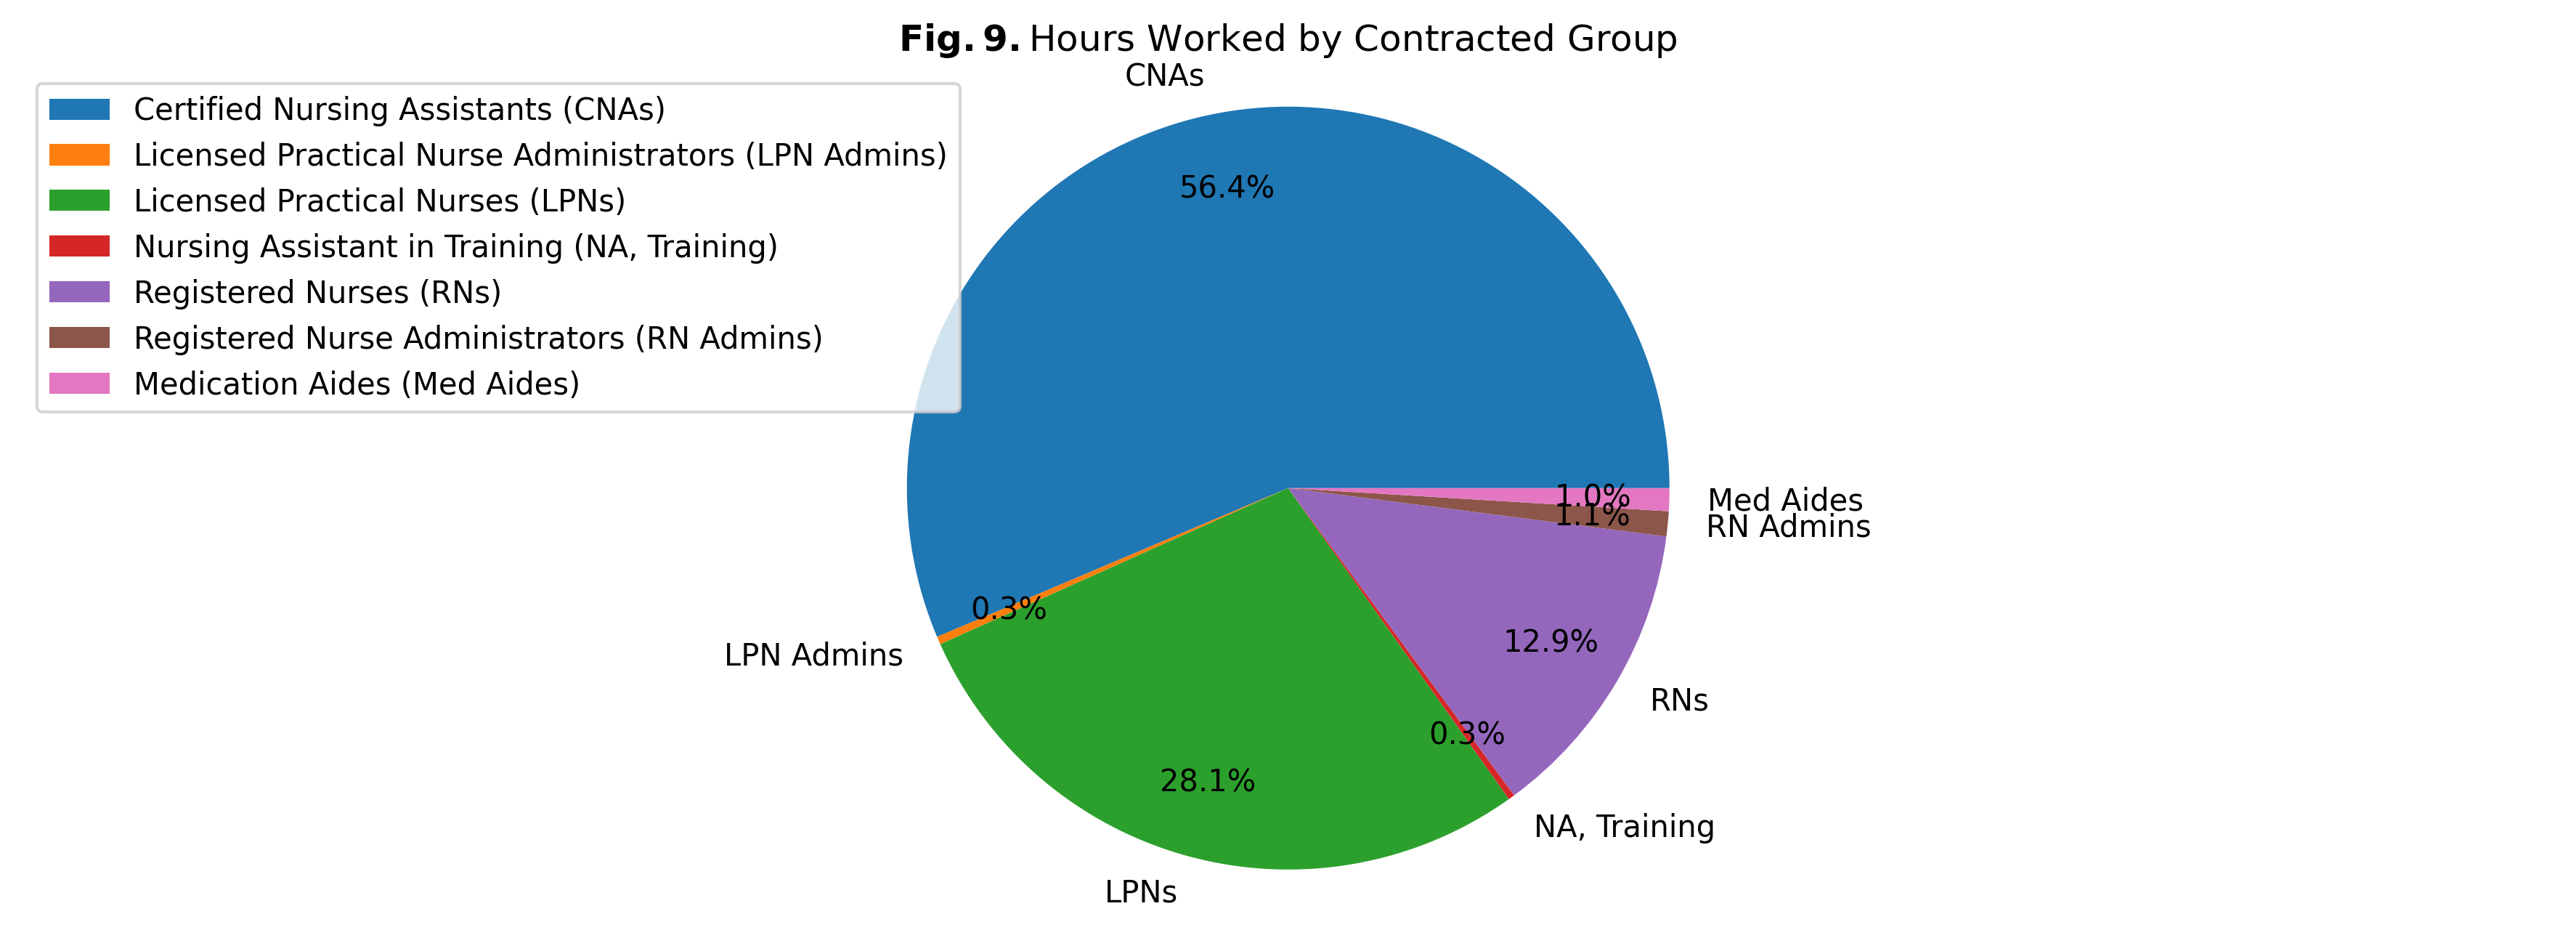

In [43]:
contracted = data[['Hrs_RNadmin_ctr', 'Hrs_RN_ctr', 'Hrs_LPNadmin_ctr', 'Hrs_LPN_ctr', 'Hrs_CNA_ctr', 'Hrs_NAtrn_ctr', 'Hrs_MedAide_ctr']].copy()

# Order categories for more legible pie chart
order = [
    'Hrs_CNA_ctr', 'Hrs_LPNadmin_ctr', 'Hrs_LPN_ctr', 'Hrs_NAtrn_ctr', 'Hrs_RN_ctr', 'Hrs_RNadmin_ctr', 'Hrs_MedAide_ctr'
]

# Get total hours for each group
total_hours = contracted[order].sum()

# Rename ticks for each group
plt_group_names = {
    'Hrs_RN_ctr': 'RNs',
    'Hrs_RNadmin_ctr': 'RN Admins',
    'Hrs_LPNadmin_ctr': 'LPN Admins',
    'Hrs_LPN_ctr': 'LPNs',
    'Hrs_CNA_ctr': 'CNAs',
    'Hrs_NAtrn_ctr': 'NA, Training',
    'Hrs_MedAide_ctr': 'Med Aides'
}

legend_group_names = {
    'Hrs_RN_ctr': 'Registered Nurses (RNs)',
    'Hrs_RNadmin_ctr': 'Registered Nurse Administrators (RN Admins)',
    'Hrs_LPNadmin_ctr': 'Licensed Practical Nurse Administrators (LPN Admins)',
    'Hrs_LPN_ctr': 'Licensed Practical Nurses (LPNs)',
    'Hrs_CNA_ctr': 'Certified Nursing Assistants (CNAs)',
    'Hrs_NAtrn_ctr': 'Nursing Assistant in Training (NA, Training)',
    'Hrs_MedAide_ctr': 'Medication Aides (Med Aides)'
}


# Plotting
plt.figure(figsize=(15, 5))
plt.pie(total_hours, labels=[plt_group_names[label] for label in total_hours.index], autopct='%1.1f%%', pctdistance=0.8)

# Labels and title
plt.title(r"$\bf{" + "Fig.9. " + "}$" + "Hours Worked by Contracted Group")
plt.legend(labels=[legend_group_names[label] for label in total_hours.index], loc='upper left')
plt.axis('equal')
plt.show()

# Recommendations

## Optimizing Staffing State-Wide

Analyzing the total hours worked by registered nurses (RNs) across various states provides critical insights into staffing needs. The top 5 states with the most total hours are as follows (values have been rounded to the nearest hour).

| State | Contracted Hours | Employed Hours | Total Hours |
| - | - | - | - |
|NY | 776,878 | 3,639,189 | 4,416,067 |
|CA | 85,274 | 3,347,767 | 3,433,042 |
|FL | 107,718 | 3,168,570 | 3,276,288 |
|PA | 411,631 | 2,421,978 | 2,833,609 |
|IL | 369,883 | 2,408,731 | 2,778,614 |

**Fig. 1.** reveals that New York leads with a substantial margin of **983,025 total** hours over the next highest state (CA), indicating a pronounced reliance on nursing services. New York also stands out with a substantial margin of **365,247** total hours of contracted work over the next highest state (PA). This data emphasizes the necessity for ensuring an adequate supply of contracted RNs in high-demand states like New York, California, Florida, Pennsylvania, and Illinois, where total hours worked are substantial.

In terms of market potential, **Fig. 2.** highlights states with the highest percentages of contracted RNs. New York exhibits a **17.6%** contracted to employed RN ratio, followed by Massachussets (**17.1%**), Delaware (**16.5%**), Oregon (**16.1%**) and Maine (**15.5%**). Despite New York’s large total hours, the relatively modest percentage of contracted RNs suggests that there is significant room for growth in this segment. Targeting recruitment efforts in these states could substantially increase market share and ability to meet local nursing demands.

Conversely, **Fig. 3.** identifies states with the lowest percentages of contracted RNs, notably Alabama and Puerto Rico, each at a mere **1.8%**, followed by Louisiana (**1.9%**) and Texas (**2.3%**). At fifth, California, with **2.5%** contracted RNs, presents a contrast; while it holds the second-highest total hours of RN work, its low percentage of contracted RNs highlights a potential market gap. This warrants further investigation into the barriers preventing a more extensive use of contracted RNs in these areas. Outreach programs should be considered in these states to educate healthcare facilities on the flexibility and cost-effectiveness of contracting RNs.

Focusing on California and Florida as investment opportunities could be beneficial given their total hours worked. Despite Florida ranking third for total hours at **107,718**, it has the tenth lowest percentage of contracted RNs. This discrepancy signifies a valuable opportunity for growth. In California, while the total hours are substantial, the low percentage of contracted RNs suggests potential for expanding contracted services to fulfill the apparent demand.

Overall, optimizing staffing state-wide involves not only targeting high-demand states with robust total hours worked but also addressing regions with low contracted RN usage through strategic marketing and education initiatives. By aligning recruitment strategies with data-driven insights from total hours and contracted RN percentages, service delivery and the impact on the nursing landscape in these states can be significantly enhanced.

## Provider Performance Insights

**Fig. 6.** provides a comprehensive analysis of provider performance, highlighting both the top-performing facilities. The top five providers by total hours worked by contracted RNs include Workmens Circle Multicare Center (**29,469**), The Plaza Rehab and Nursing Center (**22,796**), Franklin Center for Rehabilitation and Nursing (**21,670**), New York Center for Rehabilitation & Nursing (**20,377**), and Queens Boulevard Extended Care Facility (**16,297.75**). These providers not only demonstrate high engagement in contracted RN hours but also reflect an established operational framework conducive to effective staffing solutions. Strengthening partnerships with these high-performing providers can significantly enhance service delivery and client satisfaction, ultimately leading to improved outcomes for the healthcare facilities they serve.

On the other hand, **Fig. 7.** presents insights into the bottom-performing providers, such as Canyon Springs Post-Acute, Callaway Good Life Center, Wynwood Rehabilitation and Healthcare Center, Shepherd of The Valley-Boardman, and Shepherd of the Valley Howland. All of these providers logged at most **1** hour of contracted RN service and represent the lower end of the performance spectrum. Notably, there are **9,295** providers with fewer than **24** total hours, indicating a substantial number of facilities underutilizing contracted RNs. This presents an opportunity consider strategies for improvement or phasing out underperforming providers to maintain quality service standards.

**Fig. 8.** displays some of the average providers. The mean hours worked by contracted RNs stands at **273** hours, which underscores the performance disparities across providers. Facilities that exceed this average, particularly those seen in **Fig. 6.**, can be pivotal in identifying best practices that lead to successful outcomes. Sharing insights and strategies from these high-performing providers can foster a culture of continuous improvement across all facilities. Implementing performance benchmarking and regular assessments will allow targeted goals for underperforming providers, encouraging them to adopt successful strategies utilized by their higher-performing counterparts.

The analysis of provider performance reveals critical insights that can guide decision-making processes. By bolstering relationships with successful providers, investigating the causes behind underperformance, and promoting the usage of best practices, the overall efficacy of contracted RN services can be enhanced, leading to better healthcare delivery and higher levels of client satisfaction.

## Evaluating Contracted Groups

The analysis presented in **Fig. 9.** provides a detailed breakdown of hours worked by various contracted nursing groups, offering insights into their effectiveness and potential areas for prioritization. The data reveals that Certified Nursing Assistants (CNAs) dominate the workforce, accounting for **56.4%** of the total hours worked. Given their substantial contribution, strategies to enhance their training, support, and retention to ensure continued quality care should be considered. Licensed Practical Nurses (LPNs) contribute **28.1%** of total hours worked, making them a significant group within the contracted workforce.

Registered Nurses (RNs), while still an important group, represent **12.8%** of the total hours. This lower percentage could reflect an underutilization of RNs within contracted services. Staffing models may need to be reassessed to ensure RNs are deployed effectively, potentially expanding their roles to take on more complex patient care tasks that align with their training.

Registered Nurse Administrators (RN Admins) and Medication Aides (Med Aides) contribute minimally, accounting for **1.1%** and **1.0%** of total hours, respectively. This suggests that these roles may not be fully utilized within current contracted frameworks. 

The data also indicates a very small fraction of hours attributed to Nursing Assistant in Training (NA, Training) and Licensed Practical Nurse Administrators (LPN Admins), both at just **0.3%**. These groups may require additional focus to increase their effectiveness and support within healthcare settings.

Overall, evaluating the hours worked by each contracted group not only highlights the significant contributions of CNAs and LPNs but also underscores potential areas for development within the RN and administrative roles. By strategically focusing on these areas, staffing efficiency, improved patient outcomes, and ultimately higher quality healthcare services can be improved.

## Historical Data

The analysis of historical data is crucial for enhancing decision-making through time series predictions. However, with the current dataset limited to 2024 Q1, performing such predictions is impossible. As demonstrated in **Fig. 4.**, the stacked bar graph indicates that employed Registered Nurses (RNs) work **10.6** times more hours than contracted RNs in this quarter. Integrating historical data could offer deeper insights into staffing trends and resource allocation over time.

**Fig. 5.** presents a line graph, which would be more effective if historical data were available. Time series analysis requires multiple data points over time to identify trends, seasonality, and cyclical patterns. By combining this dataset with past data, it becomes possible to make informed predictions about future staffing needs and contracted RN utilization.

To enhance the analytical capabilities of this dataset, the following suggestions could be considered for providing predictions:
1. **Linear Regression**: A straightforward approach, linear regression can model the relationship between the number of employed RNs and various independent variables such as patient volume, seasonal trends, and geographical factors. Although it assumes a linear relationship, it can serve as a baseline model and help identify key drivers of RN hours worked.
2. **Random Forests**: This ensemble learning method is excellent for regression tasks, as it can handle nonlinear relationships and interactions between variables. By using historical data on RN hours worked, staffing levels, and patient outcomes, a Random Forest model can provide insights into the factors that most influence RN utilization and predict future staffing needs with high accuracy.
3. **Gradient Boosting Machines (GBM)**: Similar to Random Forests, GBMs are powerful for regression tasks. They build models in a stage-wise fashion, optimizing for predictive accuracy. This technique can provide detailed insights into feature importance, allowing to prioritize factors that impact staffing efficiency.
4. **Neural Networks**: For more complex datasets, deep learning techniques can be employed. A neural network could capture intricate patterns in the data, potentially improving prediction accuracy for RN staffing levels

By utilizing machine learning algorithms, historical data can be analyzed more effectively, leading to better predictions of staffing needs. This, in turn, will enable proactive staffing strategies, ensuring that healthcare facilities have the necessary resources to meet patient demands efficiently. Combining multiple algorithms and validating them against historical outcomes can further enhance predictive accuracy and provide a comprehensive understanding of staffing dynamics.